<h1>H20 AutoML Employee Attrition</h1>

Answer the following questions for all of the models:

Is the relationship significant?

Are any model assumptions violated?

Is there any multicollinearity in the model?

In the multivariate models are predictor variables independent of all the other predictor variables?

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Does the model make sense?

Does regularization help?

Which independent variables are significant?

Which hyperparameters are important?


<h2>About the Dataset</h2>

The dataset provided is a fictional dataset created by IBM data scientists to simulate employee attrition. It encompasses various factors and attributes associated with employees, ranging from demographic information to job-related aspects. This dataset is designed for data science and analytical purposes to explore the underlying factors contributing to employee attrition within a hypothetical organization

<h2>Abstract</h2>

The dataset aims to shed light on the intricate dynamics of employee attrition, offering a comprehensive set of features that capture different facets of an employee's professional and personal life. It includes variables such as education level, environmental satisfaction, job involvement, job satisfaction, performance rating, relationship satisfaction, and work-life balance.

The educational background of employees is categorized into five levels: 'Below College,' 'College,' 'Bachelor,' 'Master,' and 'Doctor.' Various aspects of job satisfaction, such as environmental satisfaction, job involvement, job satisfaction, performance rating, relationship satisfaction, and work-life balance, are quantified on different scales.

The dataset presents an opportunity to investigate correlations and patterns within these attributes and their impact on employee attrition. It encourages exploratory data analysis and the application of machine learning models to predict and understand the likelihood of attrition based on the provided features.

Researchers and data scientists can leverage this dataset to address specific questions related to attrition, such as examining the breakdown of distance from home by job role and attrition, or comparing average monthly income based on education and attrition status. The simulated nature of the data allows for a controlled environment for experimentation and analysis, providing valuable insights that can be applied to real-world scenarios in talent management and employee retention strategies.


Importing required Libraries and H20 Initialization
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

Installing H2O

In [2]:
!pip install h2o


In [3]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing all the required libraries required for the assignment
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [6]:
min_mem_size=6 
run_time=222

In [7]:
#calculates the minimum memory size in gigabytes (GB) based on a specified percentage of available virtual memory.
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [8]:
import os
import sys
import logging
import random
import h2o

# Set JAVA_HOME to the directory where Amazon Corretto is installed
os.environ["JAVA_HOME"] = "D:\data\jdk17.0.8_8"

# Add the bin directory of Amazon Corretto to the PATH environment variable
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")

# Generate a random port number
port_no = random.randint(5555, 55555)

try:
    # Initialize H2O
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except:
    # Handle initialization failure
    logging.critical('h2o.init')
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:27432..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmp7i8xfgsf
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmp7i8xfgsf\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmp7i8xfgsf\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:27432
Connecting to H2O server at http://127.0.0.1:27432 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_LENOVO_9k68pp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [9]:
# Import the processed data from notebook One
url = 'https://raw.githubusercontent.com/mukuldesai/DS/main/HR%20Employee%20Attrition.csv?token=GHSAT0AAAAAACNBX6PXMGL6M66EM5BNMA66ZNUIEPA'

df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/mukuldesai/DS/main/HR%20Employee%20Attrition.csv?token=GHSAT0AAAAAACNBX6PXMGL6M66EM5BNMA66ZNUIEPA')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
dff.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
dff.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Provides summary statistics for each numerical column in the DataFrame, including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

<Axes: >

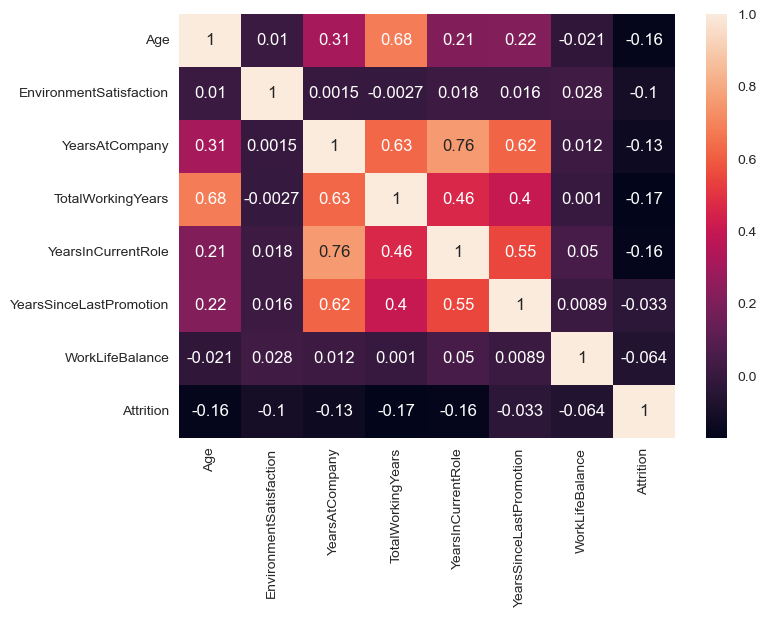

In [16]:
import pandas as pd
import seaborn as sns

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/mukuldesai/DS/main/HR%20Employee%20Attrition.csv?token=GHSAT0AAAAAACNBX6PXMGL6M66EM5BNMA66ZNUIEPA'
data = pd.read_csv(url)

# Convert 'Attrition' column to binary (0 or 1)
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

# Select the required columns for correlation calculation
data_for_corr = data[['Age', 'EnvironmentSatisfaction', 'YearsAtCompany', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'Attrition']]

# Plot the heatmap
sns.heatmap(data_for_corr.corr(), annot=True)


In [17]:
data_for_corr

,Age,EnvironmentSatisfaction,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,41,2,6,8,4,0,1,1
1,49,3,10,10,7,1,3,0
2,37,4,0,7,0,0,3,1
3,33,4,8,8,7,3,3,0
4,27,1,2,6,2,2,3,0
...,...,...,...,...,...,...,...,...
1465,36,3,5,17,2,0,3,0
1466,39,4,7,9,7,1,3,0
1467,27,2,6,6,2,0,3,0
1468,49,4,9,17,6,0,2,0


H2O ML Algorithm

We start the H2O Algorithm and run the training models

In [18]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmpbm20iomb
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmpbm20iomb\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmpbm20iomb\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_LENOVO_25cii2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [19]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [20]:
# Adding the imported variable from Panda to H2O
datahf = h2o.H2OFrame(data_for_corr)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
# Data exploration and munging. Generate scatter plots 
data = datahf
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/datahf.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

In [22]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


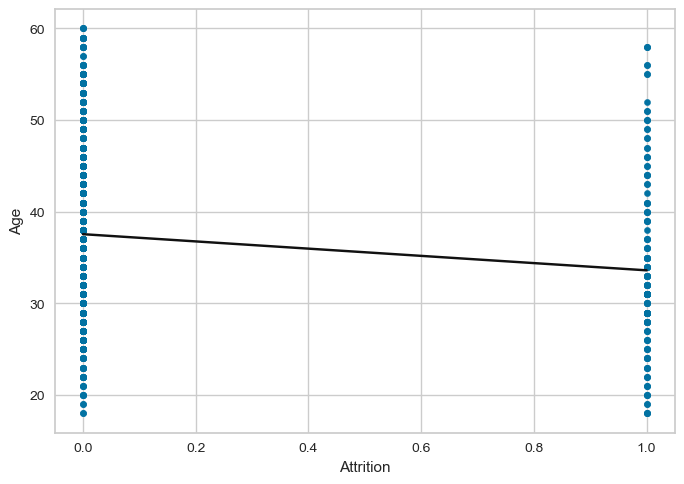

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


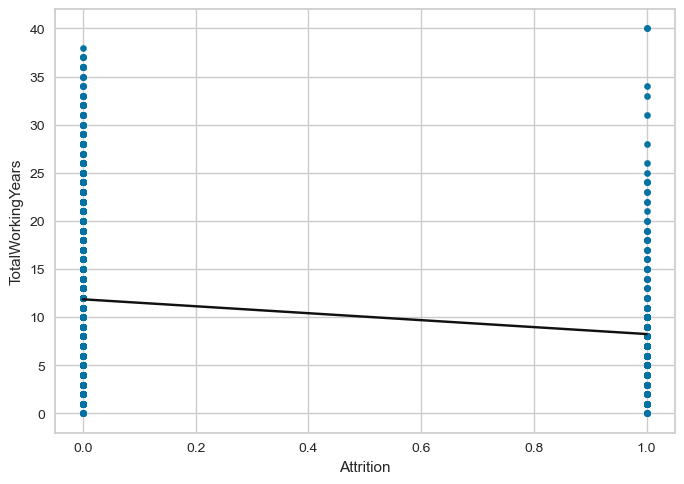

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


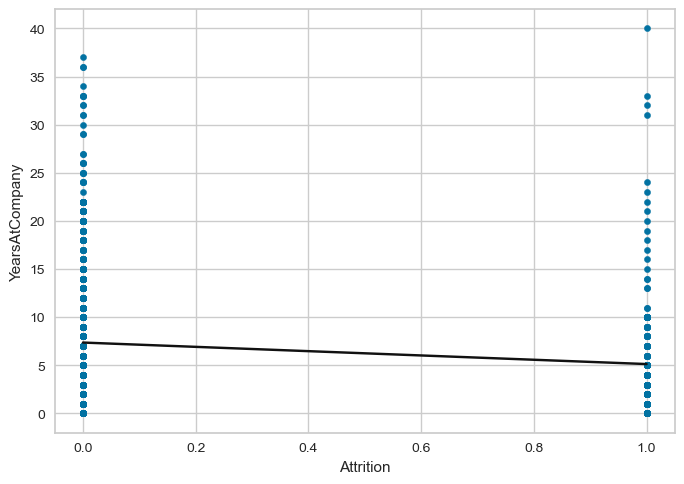

In [23]:
scatter_plot(data, "Attrition", "Age", fit = True)
scatter_plot(data, "Attrition", "TotalWorkingYears", max_points = 2000, fit = True)
scatter_plot(data, "Attrition", "YearsAtCompany", max_points = 2000, fit = True)

This Scatter Plot shows the relation between the dependent variable Attrition and the Independent variables TotalWorkingYears , Age and YearsAtCompany

In [24]:
data.describe()

Rows:1470
Cols:8

,Age,EnvironmentSatisfaction,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion,WorkLifeBalance,Attrition
type,int,int,int,int,int,int,int,int
mins,18.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
mean,36.92380952380955,2.7217687074829935,7.008163265306127,11.279591836734703,4.229251700680271,2.187755102040815,2.7612244897959215,0.16122448979591836
maxs,60.0,4.0,40.0,40.0,18.0,15.0,4.0,1.0
sigma,9.13537348913673,1.0930822146350003,6.126525152403571,7.780781675514995,3.623137034670627,3.2224302791379693,0.7064758297141507,0.367863031971962
zeros,0,0,44,11,244,581,0,1233
missing,0,0,0,0,0,0,0,0
0,41.0,2.0,6.0,8.0,4.0,0.0,1.0,1.0
1,49.0,3.0,10.0,10.0,7.0,1.0,3.0,0.0
2,37.0,4.0,0.0,7.0,0.0,0.0,3.0,1.0


In [25]:
# Create a test/train split
# Train will contain the 90% of data and test will contain 10% data
train,test = data.split_frame([.9])

In [26]:
#  Set response variable and your choice of predictor variables
# Dependant variable is Level and Predictor variables are Air Pollution and Passive Smoker
myY = "Attrition"
myX = ["Attrition","TotalWorkingYears","Age","YearsAtCompany","WorkLifeBalance"]

In [27]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708126916359_4


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.263E-4 )  4                             4                              1                       py_11_sid_ab85

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.12873267934278512
RMSE: 0.35879336580096505
MAE: 0.2595204964664664
RMSLE: 0.2522044283665496
Mean Residual Deviance: 0.12873267934278512
R^2: 0.041148214852774534
Null degrees of freedom: 1332
Residual degrees of freedom: 1328
Null deviance: 178.96474118529426
Residual deviance: 171.60066156393256
AIC: 1062.2170981301376

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.14171032601930494
RMSE: 0.37644431994559957
MAE: 0.2708177780126117
RMSLE: 0.26228270669012704
Mean Residual Deviance: 0.14171032601930494
R^2: 0.01926212792908022
Null degrees of freedom: 136
Residual degrees of freedom: 132
Null deviance: 19.82807986317659
Residual deviance: 19.414314664644778
AIC: 133.09523213024016

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae        training_r2           validation_rmse      validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  ------------------  --------------------  -------------------  ---------------------  ------------------  -------------------
    2024-02-16 18:42:11  0.000 sec   0             178.96474118529886         0.1342571201690164
    2024-02-16 18:42:11  0.031 sec   1                                                            0.35879336580096505  0.12873267934278512  0.2595204964664664  0.041148214852774534  0.37644431994559957  0.14171032601930494    0.2708177780126117  0.01926212792908022

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Age                0.038004               1                    0.349217
WorkLifeBalance    0.0251779              0.662508             0.231359
YearsAtCompany     0.0241141              0.634515             0.221583
TotalWorkingYears  0.0215303              0.566529             0.197841

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

After running this code, data_glm will contain a trained GLM model, and it can make predictions on new data or evaluate its performance on the validation dataset.

This is a regression model, and its suitable for tasks where the goal is to predict a continuous numerical value (e.g., predicting house prices).

In [28]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

In [29]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,828.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-02-16 18:42:12,0.055 sec,0.0,0.3664111,0.2685142,0.1342571,0.3804346,0.2789876,0.1447305
,2024-02-16 18:42:12,0.355 sec,1.0,0.3642428,0.2668466,0.1326728,0.3801121,0.2785464,0.1444852
,2024-02-16 18:42:12,0.412 sec,2.0,0.3624769,0.2653456,0.1313895,0.3799963,0.2781494,0.1443972
,2024-02-16 18:42:12,0.435 sec,3.0,0.3610403,0.2639948,0.1303501,0.3800337,0.2777920,0.1444256
,2024-02-16 18:42:12,0.451 sec,4.0,0.3598723,0.2627791,0.1295081,0.3801820,0.2774704,0.1445384
,2024-02-16 18:42:12,0.481 sec,5.0,0.3588593,0.2619116,0.1287800,0.3796273,0.2768361,0.1441169
,2024-02-16 18:42:12,0.558 sec,6.0,0.3579565,0.2610478,0.1281329,0.3784821,0.2758638,0.1432487
,2024-02-16 18:42:12,0.587 sec,7.0,0.3571367,0.2600334,0.1275466,0.3787433,0.2755954,0.1434465


After running this code, data_gbm will contain a trained GBM model, and you can use it to make predictions on new data or evaluate its performance on the validation dataset.

Gradient Boosting is an ensemble learning technique that combines the predictions of multiple weak learners (in this case, decision trees) to create a strong predictive model. It is often used for both classification and regression tasks.

In [30]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
import operator
import tabulate
from tabulate import tabulate
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor         |   Normalized Coefficient |
|-------------------+--------------------------|
| Intercept         |                0.15979   |
| Age               |                0.038004  |
| WorkLifeBalance   |                0.0251779 |
| YearsAtCompany    |                0.0241141 |
| TotalWorkingYears |                0.0215303 |


[('TotalWorkingYears', 37.431095123291016, 1.0, 0.649843987665243),
 ('Age', 12.368532180786133, 0.33043468645644763, 0.2147309943097722),
 ('YearsAtCompany',
  7.800498008728027,
  0.20839620061968928,
  0.13542501802498486),
 ('WorkLifeBalance', 0.0, 0.0, 0.0)]

The code provided is related to variable importance analysis for machine learning models. It appears to be written in Python and utilizes the tabulate library for displaying the results in a tabular format.

glm_varimp = data_glm.coef_norm(): This line calculates the normalized coefficients for each predictor (feature) in a Generalized Linear Model (GLM). The GLM is likely the data_glm model you trained earlier. Normalized coefficients are a way to measure the importance of each predictor in making predictions. The result is stored in the glm_varimp variable.

for k,v in iteritems(glm_varimp):: This loop iterates through the items in the glm_varimp dictionary, where k is the predictor (feature) name, and v is its normalized coefficient.

glm_varimp[k] = abs(glm_varimp[k]): This line takes the absolute value of each normalized coefficient. It ensures that all variable importances are positive, making it easier to interpret.

glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True): This line sorts the predictor-importance pairs in descending order based on the absolute value of the normalized coefficient. It uses the operator.itemgetter(1) function to sort based on the second element of each pair (the absolute value), and reverse = True indicates a descending order.

table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl"): Here, the sorted results are tabulated with headers, and the table format is specified as "orgtbl."

print("Variable Importances:\n\n" + table): Finally, this line prints the table of variable importances, including predictor names and their corresponding normalized coefficients. The header "Variable Importances" is also included in the output.

data_glm.varimp(): This line calls a method (varimp) on the data_glm GLM model to get variable importances directly from the model. Variable importances represent the importance of predictors in making predictions in the model.

data_gbm.varimp(): Similarly, this line calls a method (varimp) on the data_gbm Gradient Boosting Machine (GBM) model to get variable importances from the GBM model.

Variable importance analysis is essential for understanding which predictors have the most influence on a model's predictions. It can help in feature selection, model interpretation, and identifying the most relevant factors in a predictive model.

In [31]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',

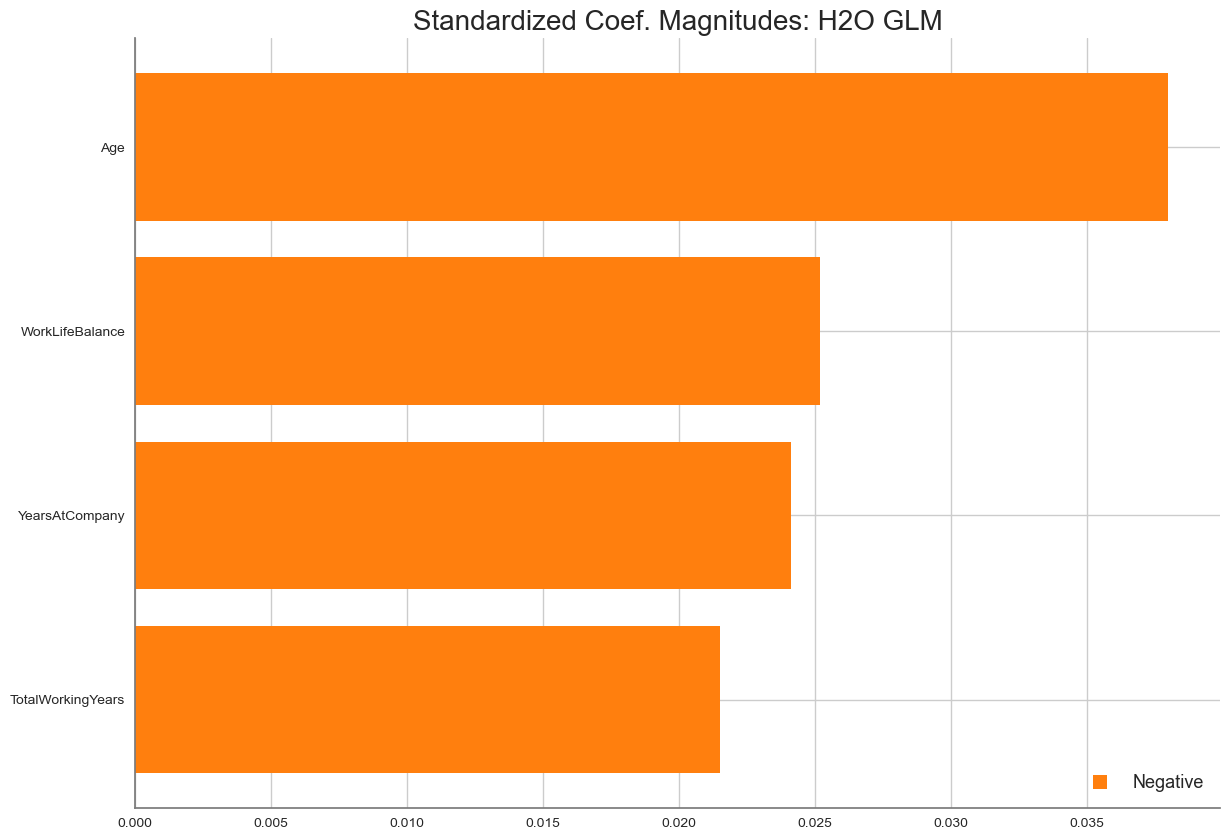

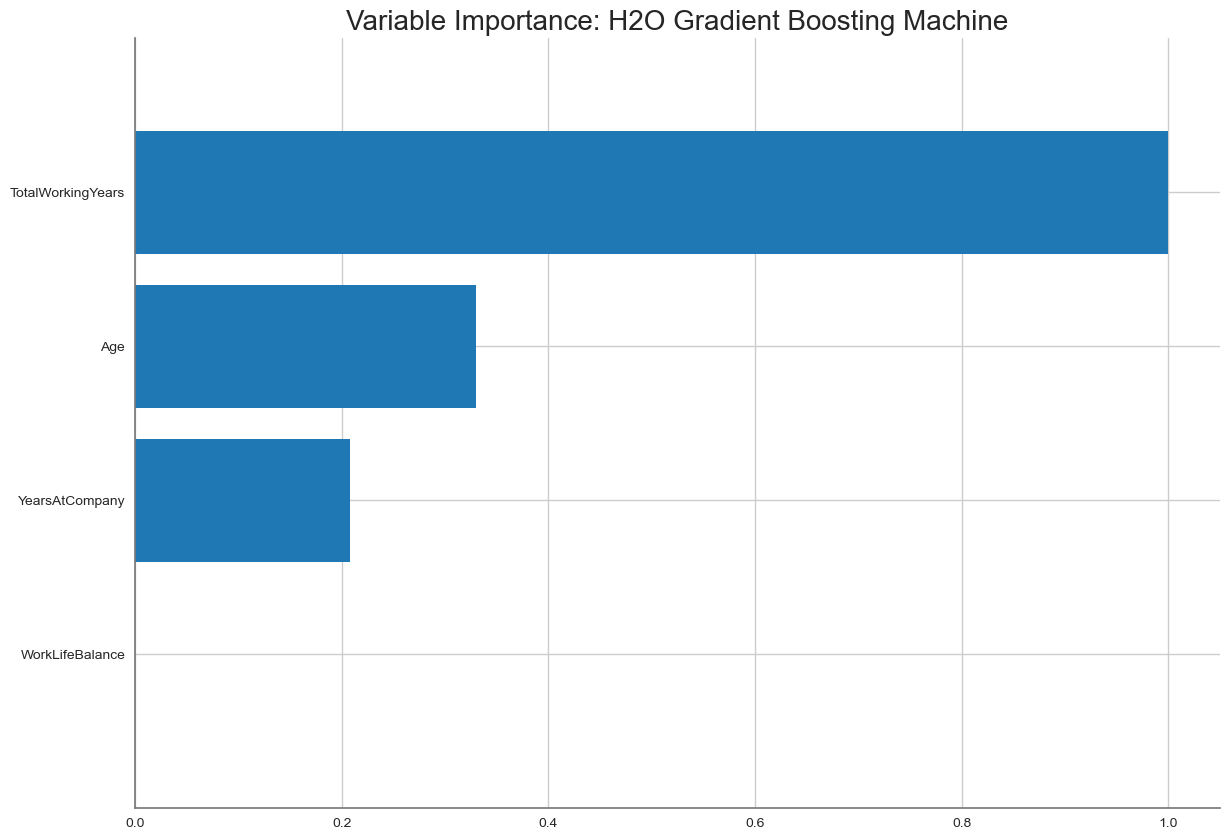

<Figure size 800x550 with 0 Axes>

In [32]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

The code is using two functions to generate plots that are common in machine learning model analysis. These plots can help you understand the importance of variables (predictors) in your models.

data_glm.std_coef_plot(): This line of code is calling the std_coef_plot() function on the data_glm Generalized Linear Model (GLM) object. Here's what it does:

data_glm: It's the GLM model that I trained. std_coef_plot(): This function is typically provided by machine learning libraries like H2O.ai or scikit-learn. It generates a standardized coefficient plot. Standardized coefficients allow you to compare the impact of different predictors on the target variable. The plot that is generated by this function will likely show the predictors on the x-axis and their standardized coefficients on the y-axis. The plot can help you understand which predictors have the most significant impact on the model's predictions.

data_gbm.varimp_plot(): This line is calling the varimp_plot() function on the data_gbm Gradient Boosting Machine (GBM) object. Here's what it does:

data_gbm: It's the GBM model that I trained. varimp_plot(): This function is used to generate a variable importance plot for GBM models. It visualizes the importance of each predictor in making predictions in the GBM model. The plot generated by this function is likely to show the predictors on the x-axis and their relative importance on the y-axis. It can help you understand which predictors have the most influence on the model's predictions and by how much.

Both of these plots are useful for model interpretation, feature selection, and identifying key predictors in your machine learning models. They provide insights into which variables have the most impact on the model's predictions, making it easier to make informed decisions about model features and potential improvements.

In [33]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1432201631625865
RMSE: 0.3784443990371459
MAE: 0.2743003744973172
RMSLE: 0.2632244418912115
Mean Residual Deviance: 0.1432201631625865

The code data_gbm.model_performance(test) is used to assess the performance of a Gradient Boosting Machine (GBM) model, data_gbm, on a test dataset (test). By using data_gbm.model_performance(test), you can access all of this information to assess how well your GBM model is performing on the test dataset. This evaluation is crucial to understand how the model generalizes to new data and whether it's overfitting or underfitting.

In [34]:
# Reduced the dataset as Age is not parameter to be used
data=data[["Attrition","TotalWorkingYears","YearsAtCompany"]]

In [35]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here
# Train will train 90% data and test will contain 10% data
train,test = data.split_frame([.9])

In [36]:
#  Set response variable and your choice of predictor variables
#myY target (Dependent variables)
#myX features (Independent variables)
myY = "Attrition"
myX = ["Attrition","TotalWorkingYears","YearsAtCompany"]

In [37]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708126916359_6


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.338E-4 )  2                             2                              1                       py_15_sid_ab85

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1300340221437275
RMSE: 0.36060230468443694
MAE: 0.26236392987224455
RMSLE: 0.25333302731790214
Mean Residual Deviance: 0.1300340221437275
R^2: 0.03511970980036494
Null degrees of freedom: 1332
Residual degrees of freedom: 1330
Null deviance: 179.64441110277738
Residual deviance: 173.33535151758878
AIC: 1071.6245772837478

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.14197274760245296
RMSE: 0.3767927117162074
MAE: 0.27266376984662316
RMSLE: 0.26632219442308047
Mean Residual Deviance: 0.14197274760245296
R^2: -0.016280129576826896
Null degrees of freedom: 136
Residual degrees of freedom: 134
Null deviance: 19.14607327750915
Residual deviance: 19.450266421536057
AIC: 129.34869643945805

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae         training_r2          validation_rmse     validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -------------------  -------------------  ------------------  ---------------------  -------------------  ---------------------
    2024-02-16 18:42:19  0.000 sec   0             179.6444111027741          0.13476700007709985
    2024-02-16 18:42:19  0.019 sec   1                                                             0.36060230468443694  0.1300340221437275   0.26236392987224455  0.03511970980036494  0.3767927117162074  0.14197274760245296    0.27266376984662316  -0.016280129576826896

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
TotalWorkingYears  0.0540433              1                    0.726136
YearsAtCompany     0.0203825              0.377152             0.273864

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In the code snippet you've provided, you are building a simple Generalized Linear Model (GLM) using the H2O library.

In this code, I have a trained GLM model in the data_glm variable. This model can be used to make predictions on new data and evaluate its performance using the validation set or other evaluation techniques. The model's coefficients will also be available for further analysis to understand the importance of each predictor variable in making predictions.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

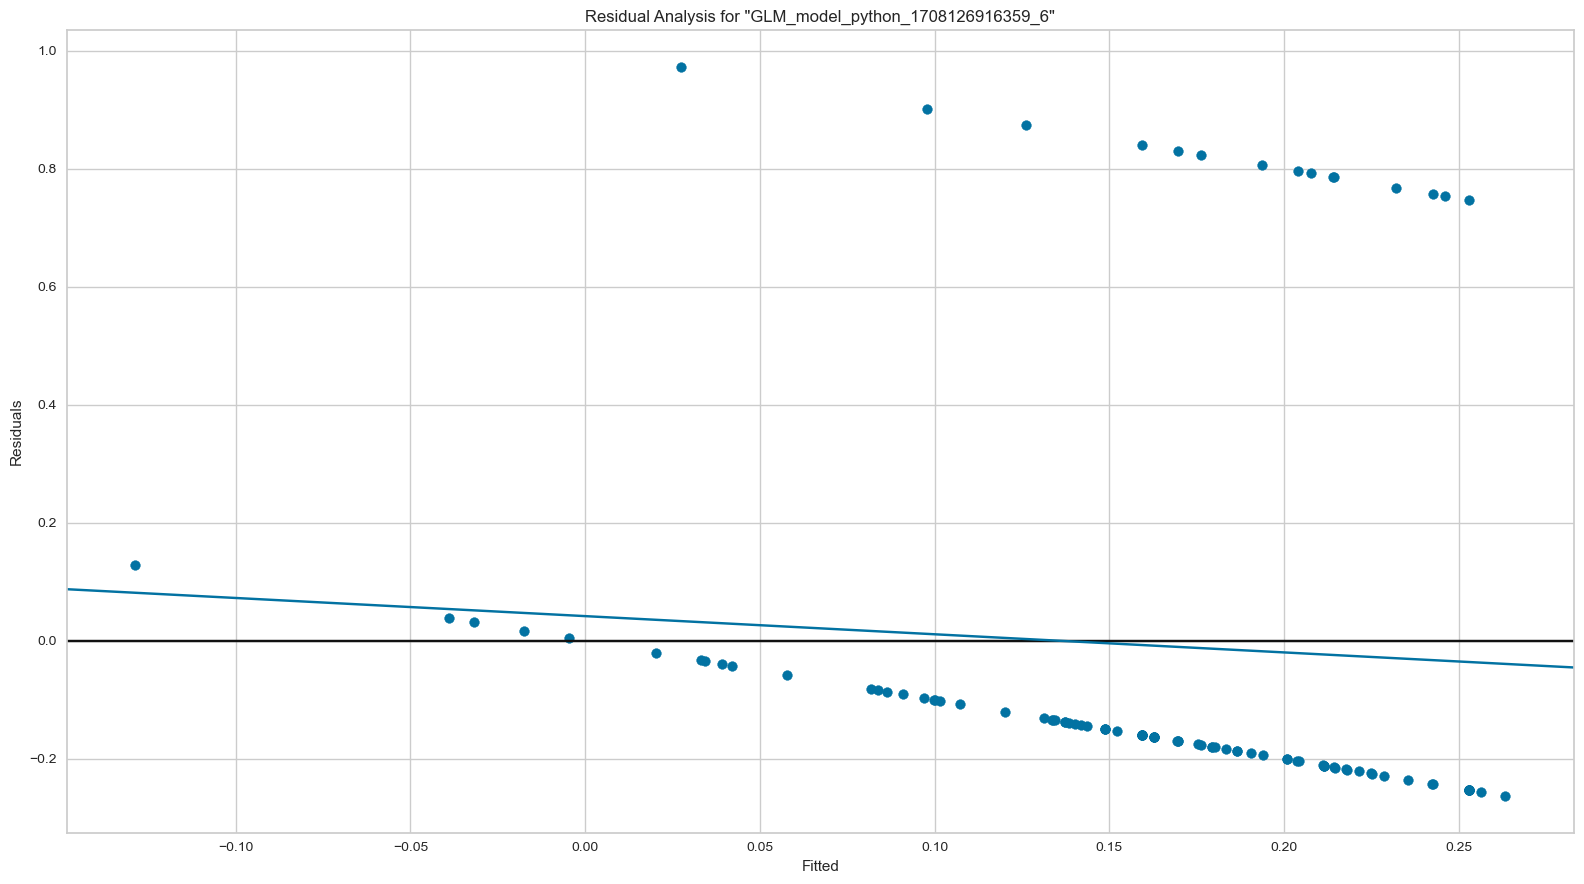

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

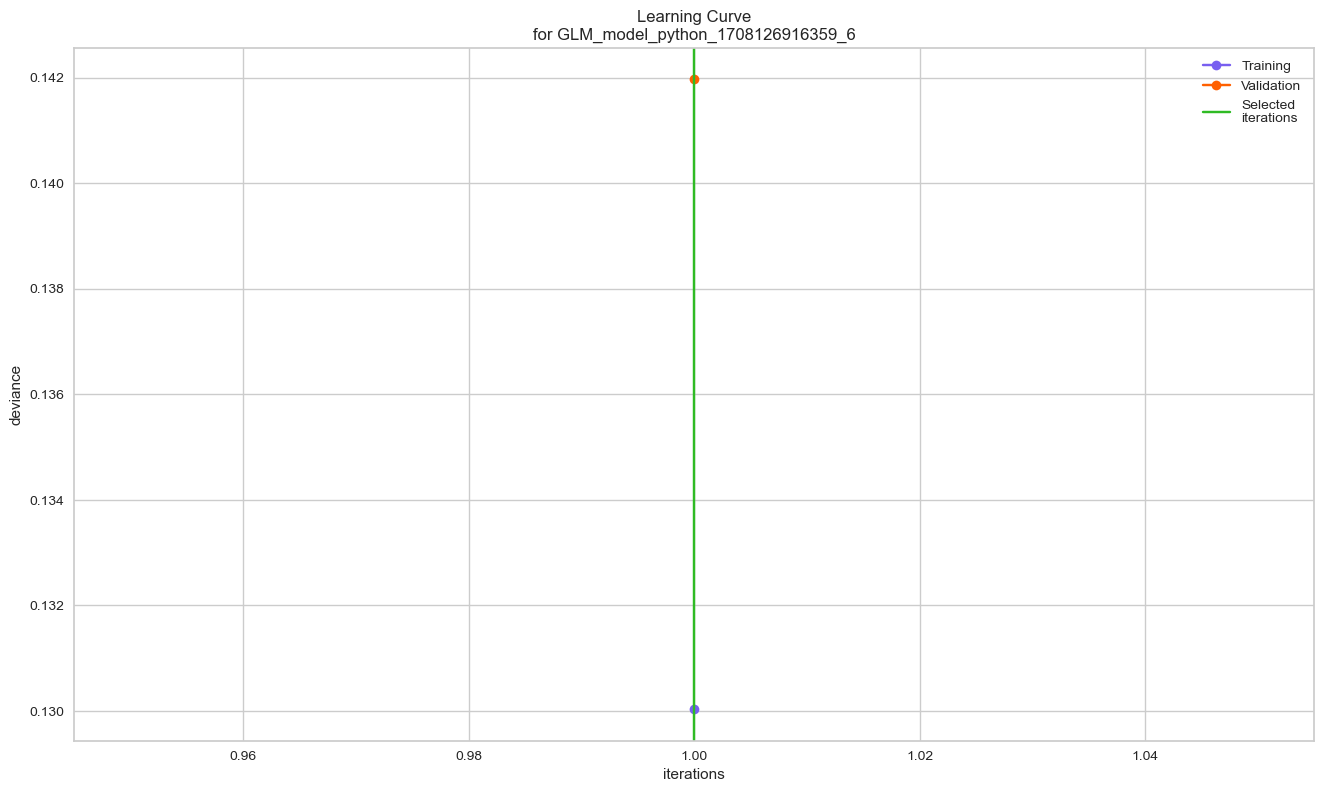

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

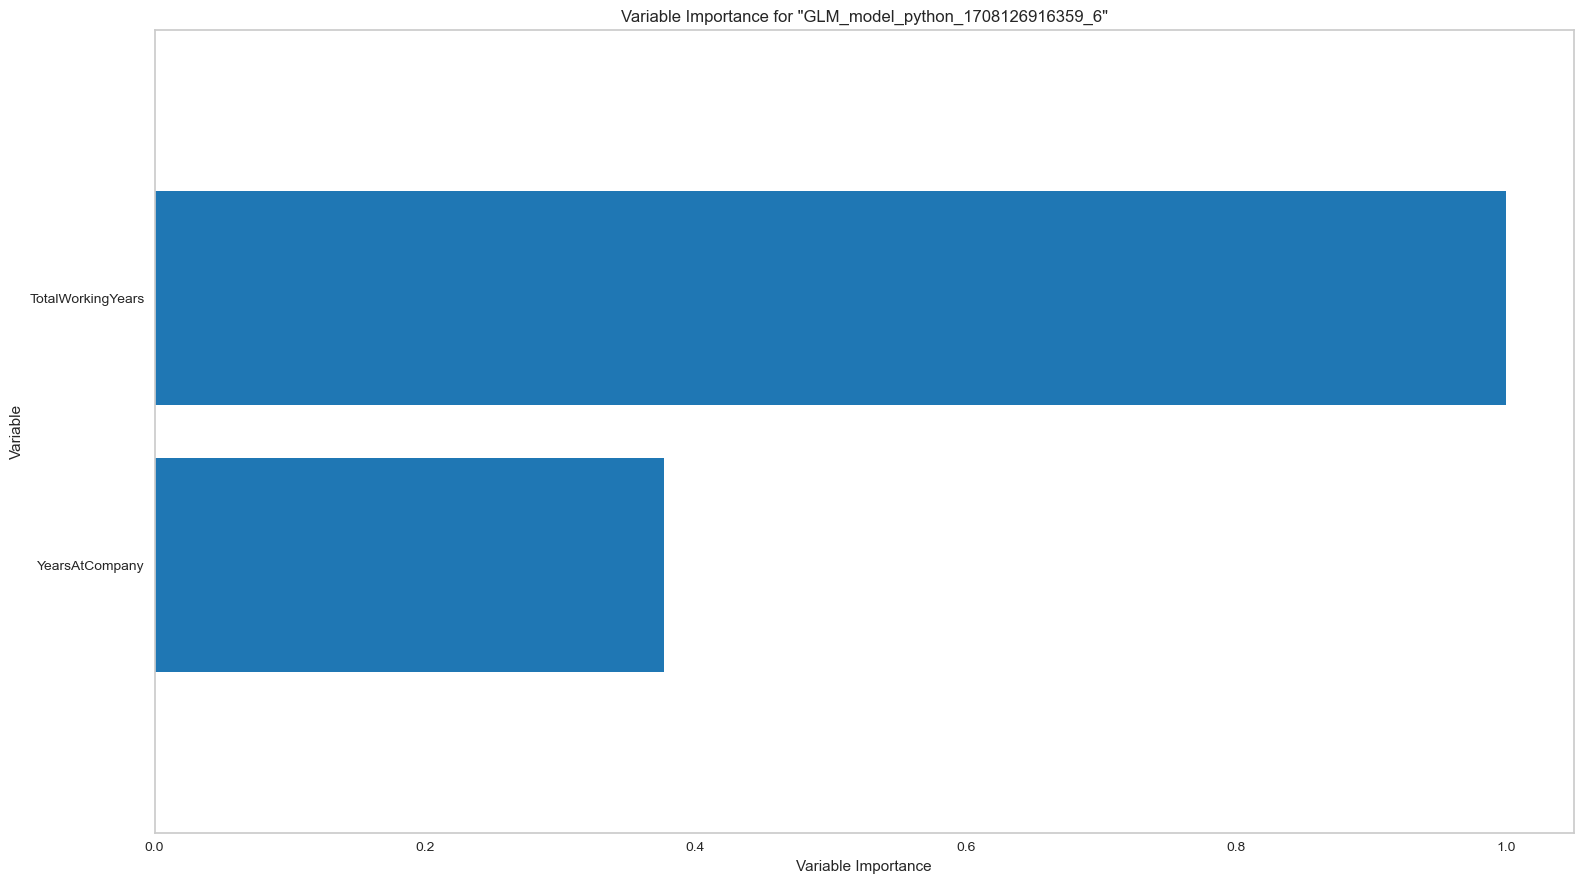

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

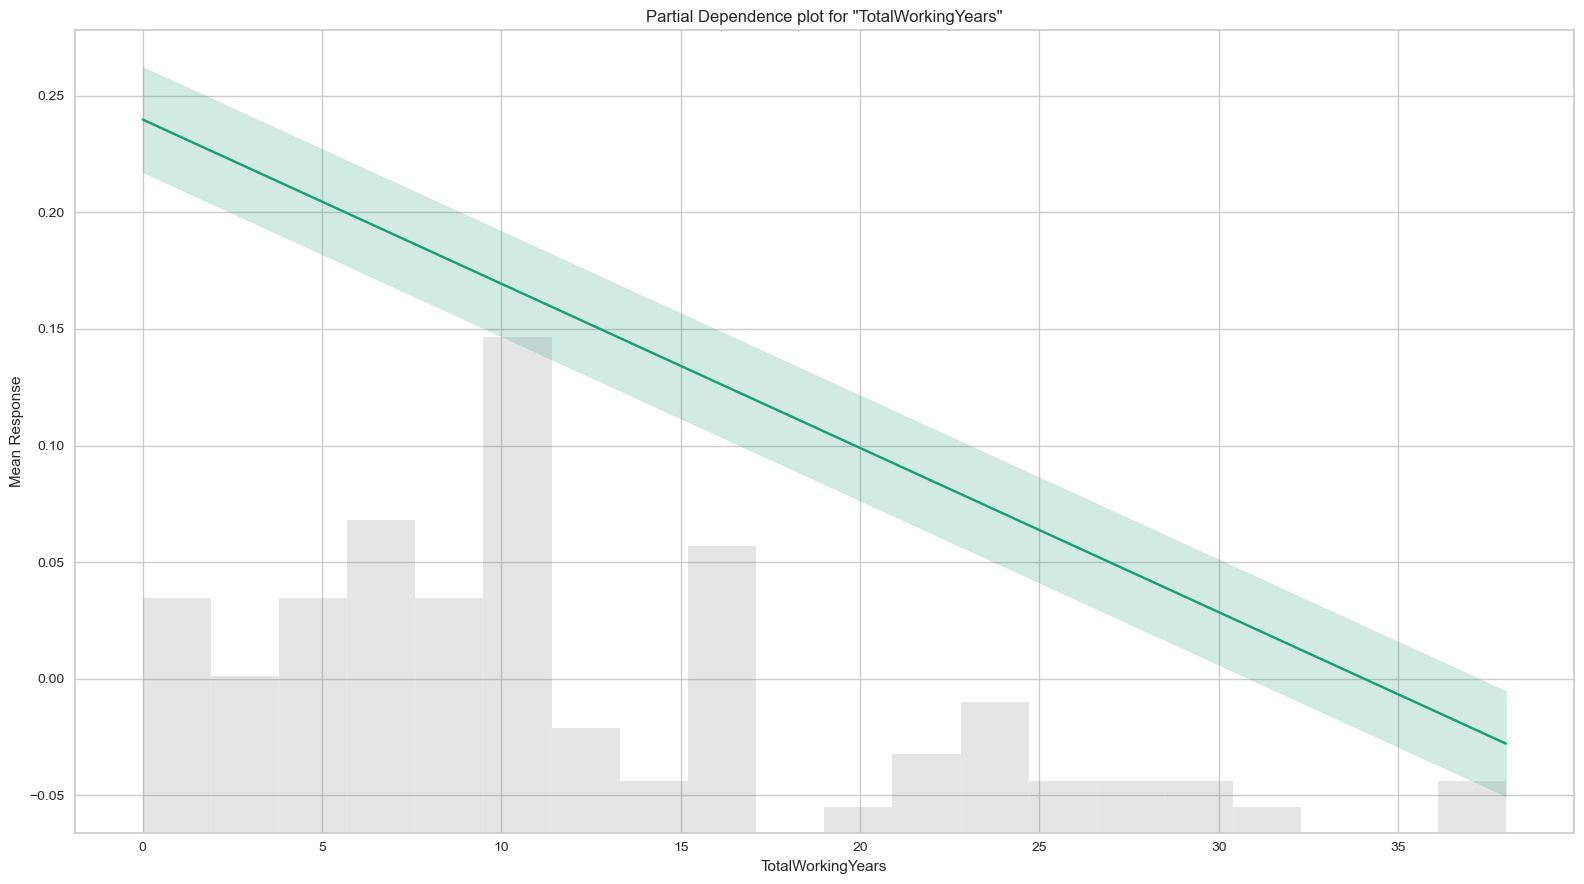

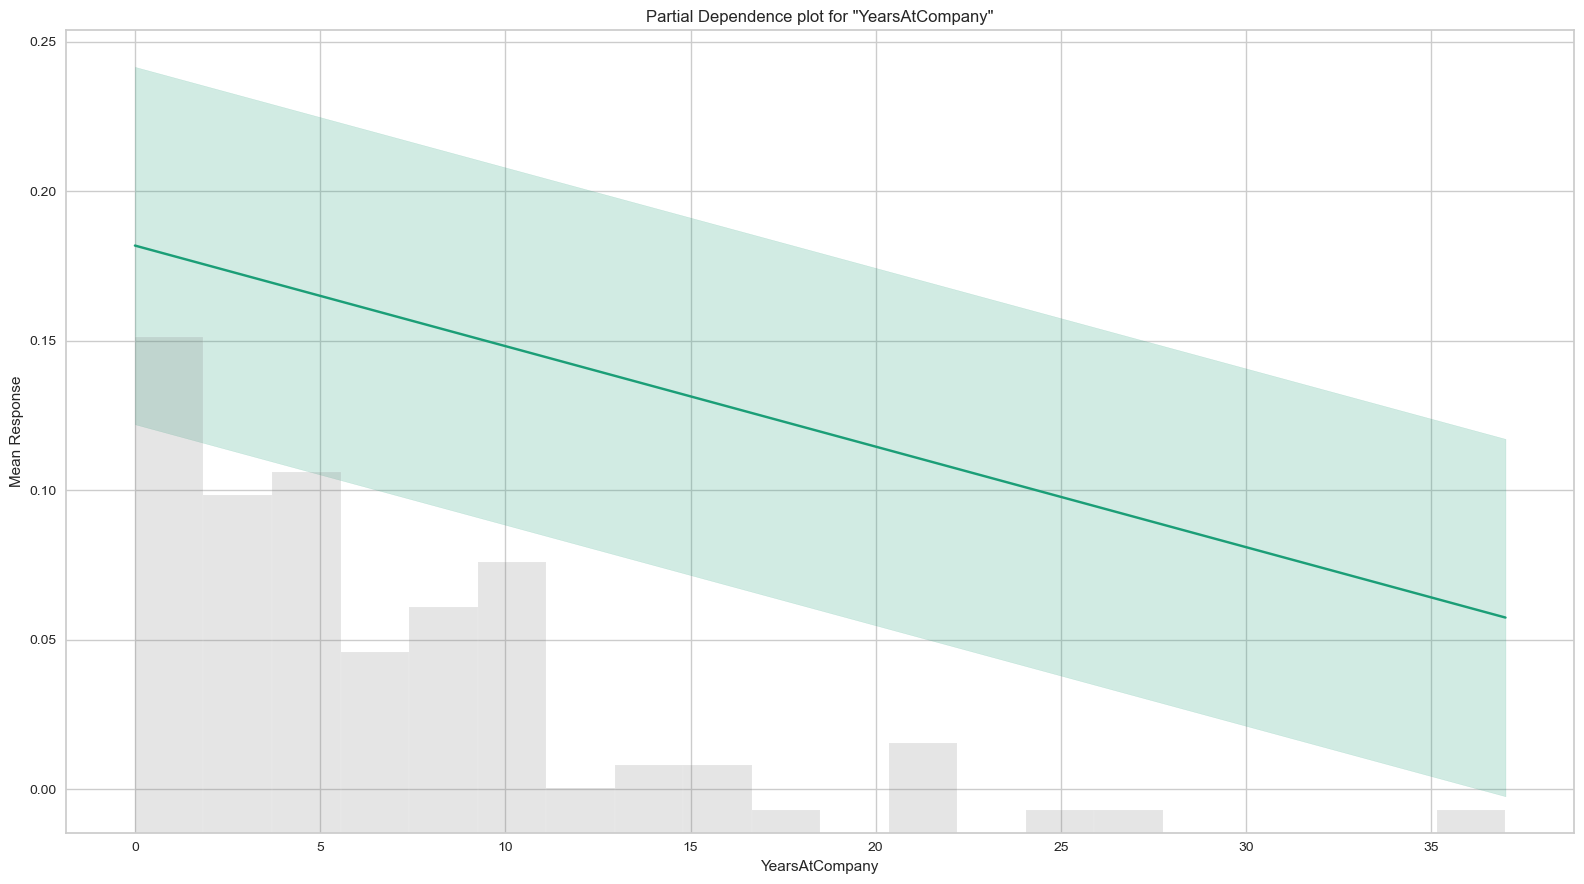

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

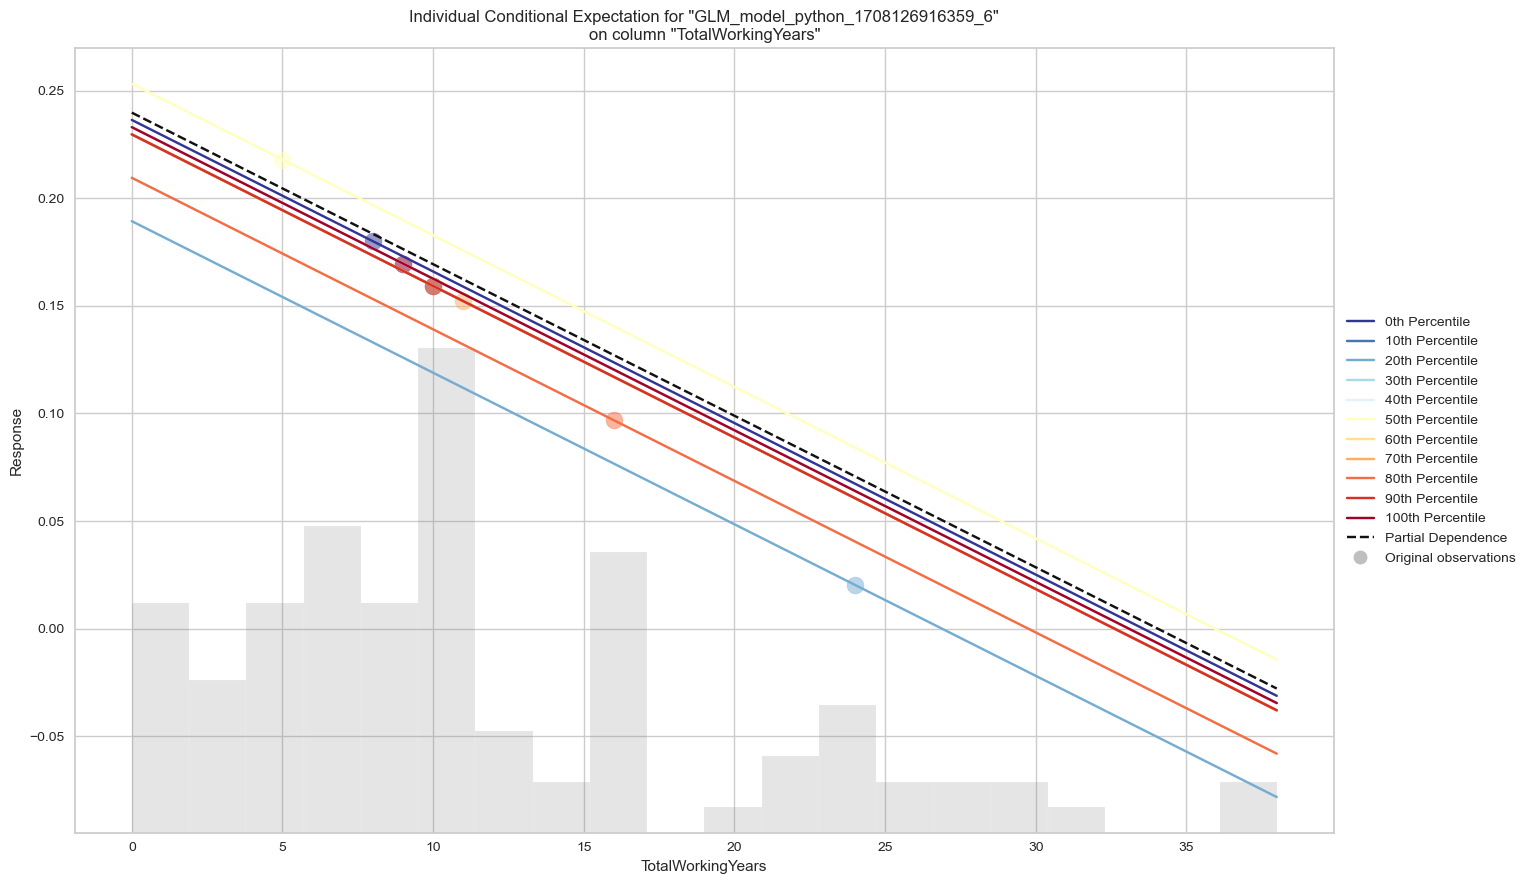

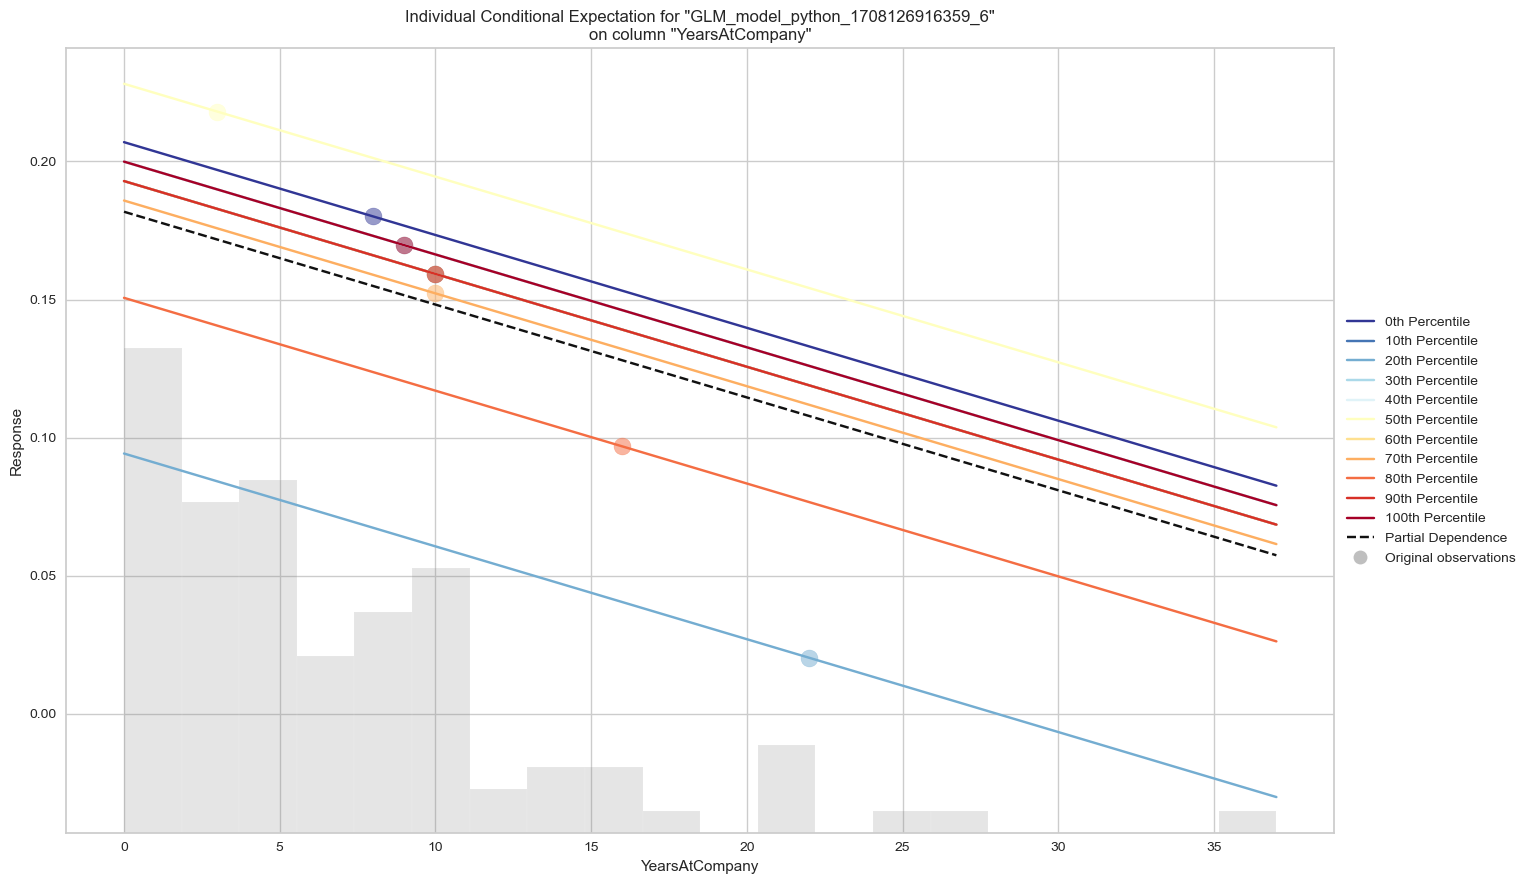

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

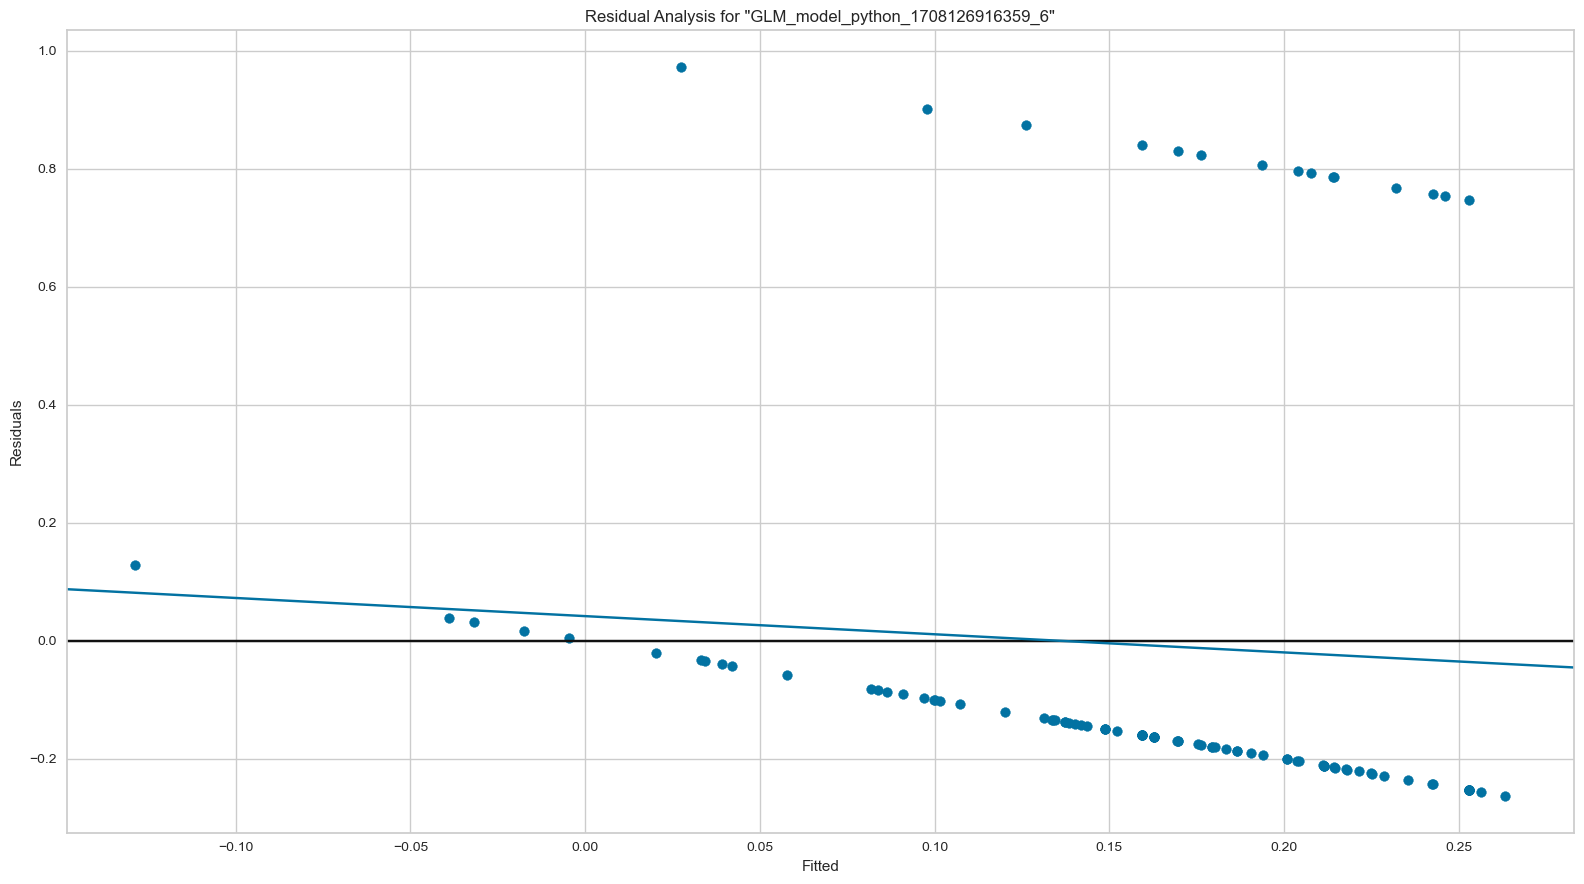

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

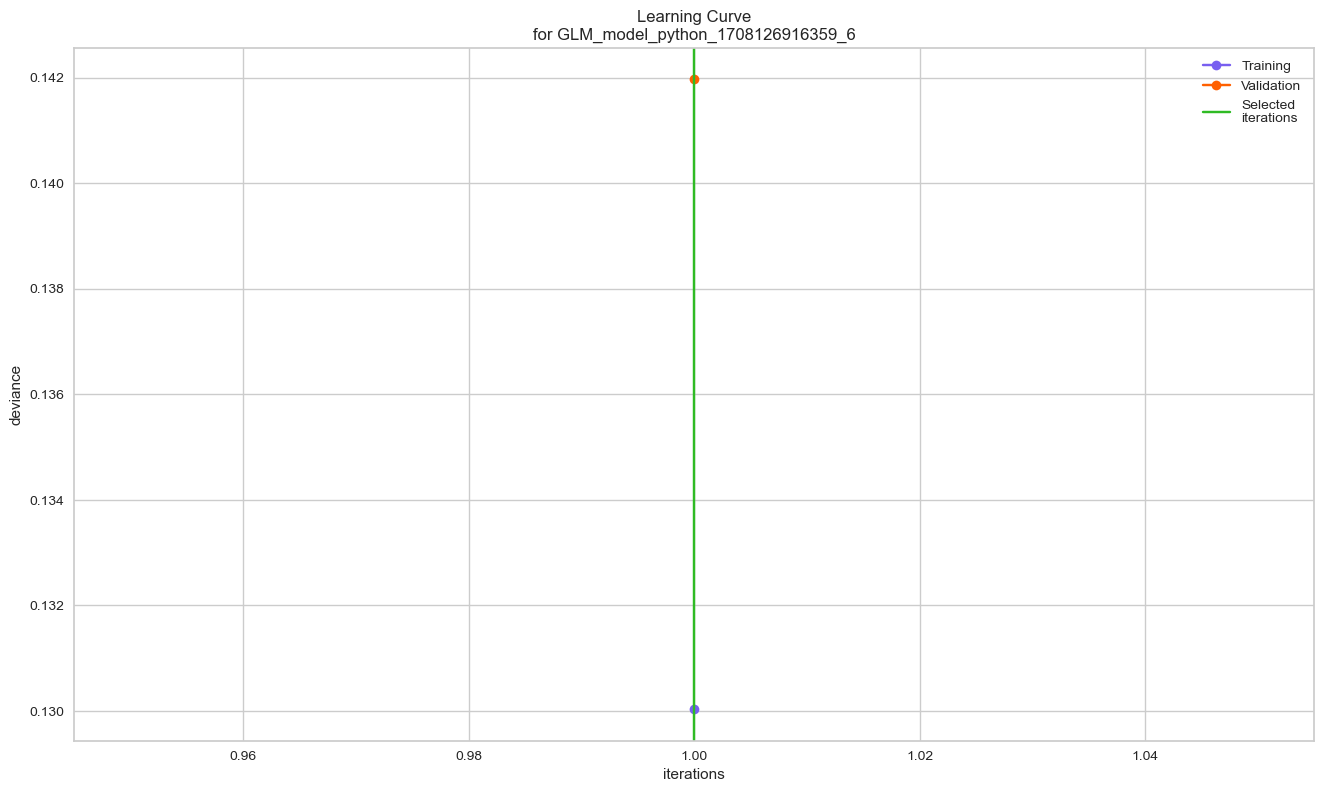

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

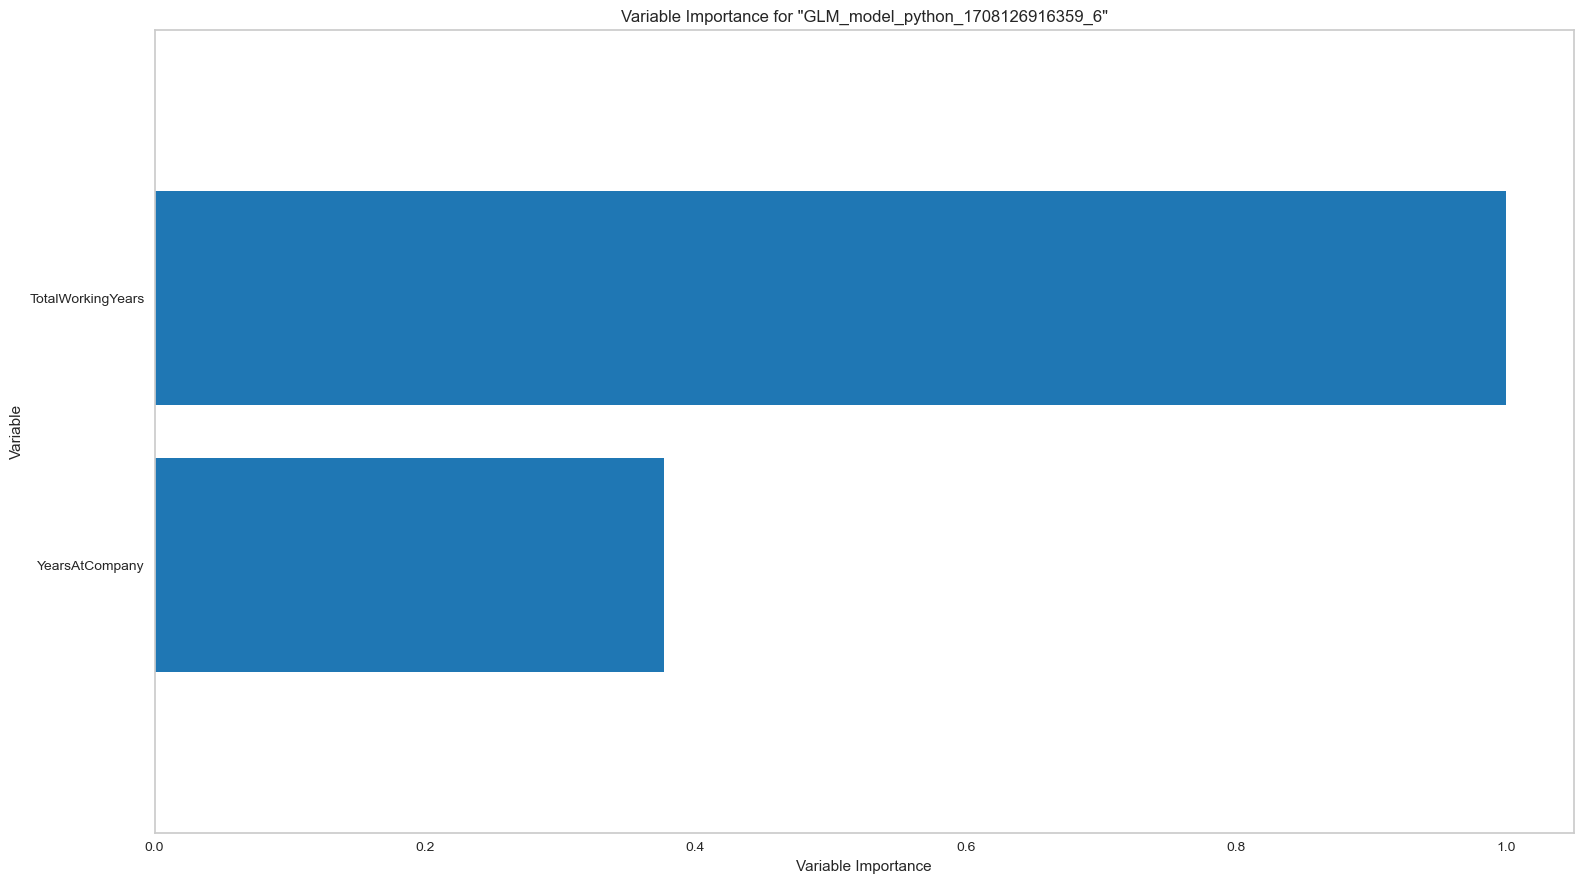

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

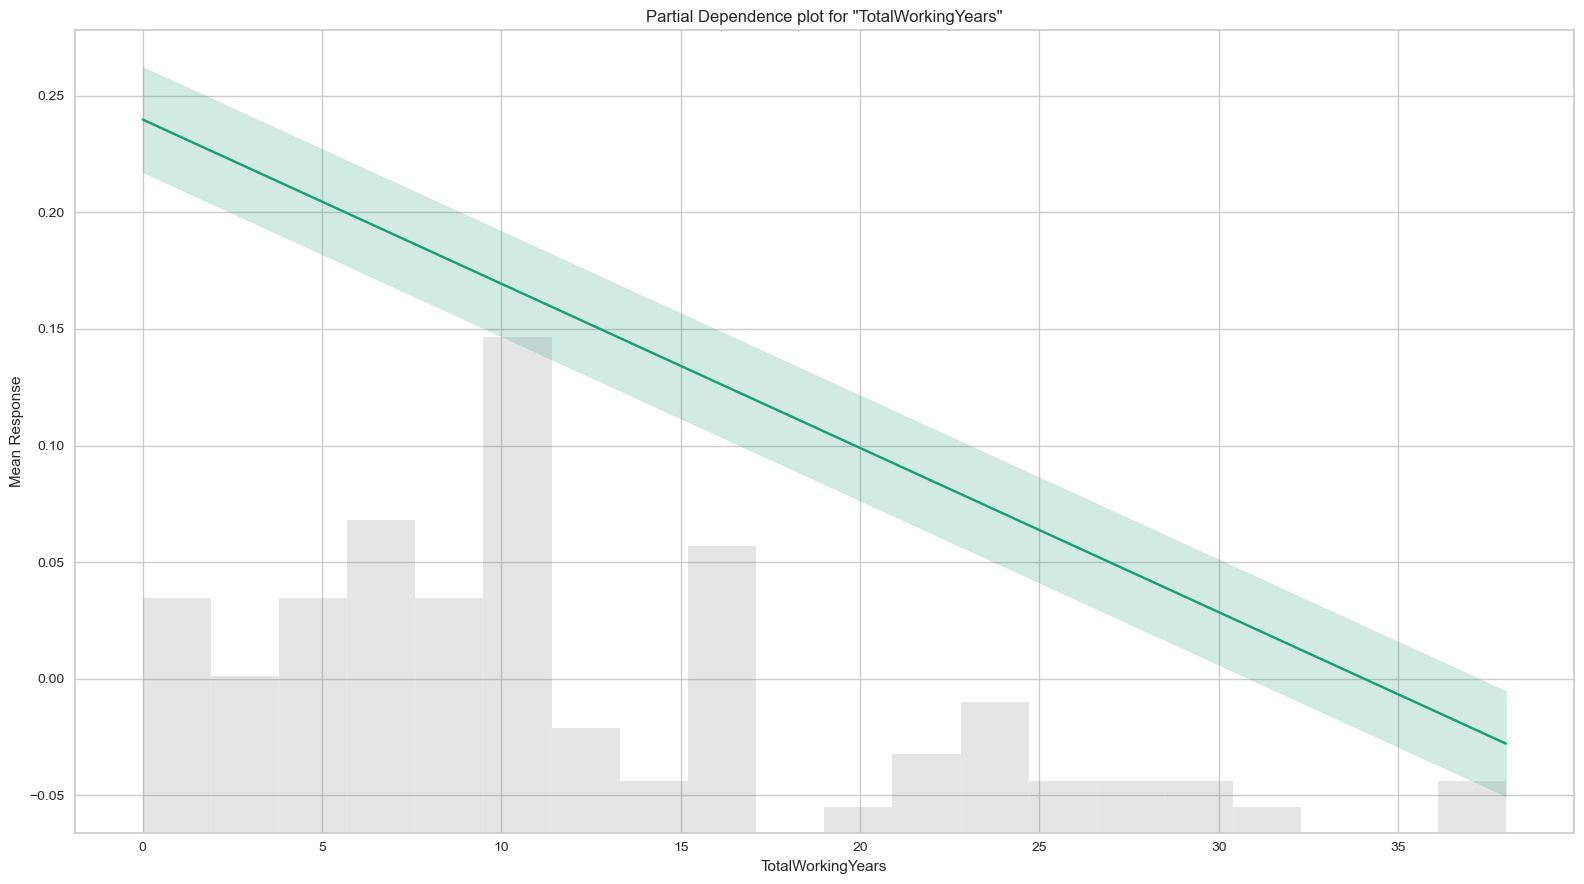

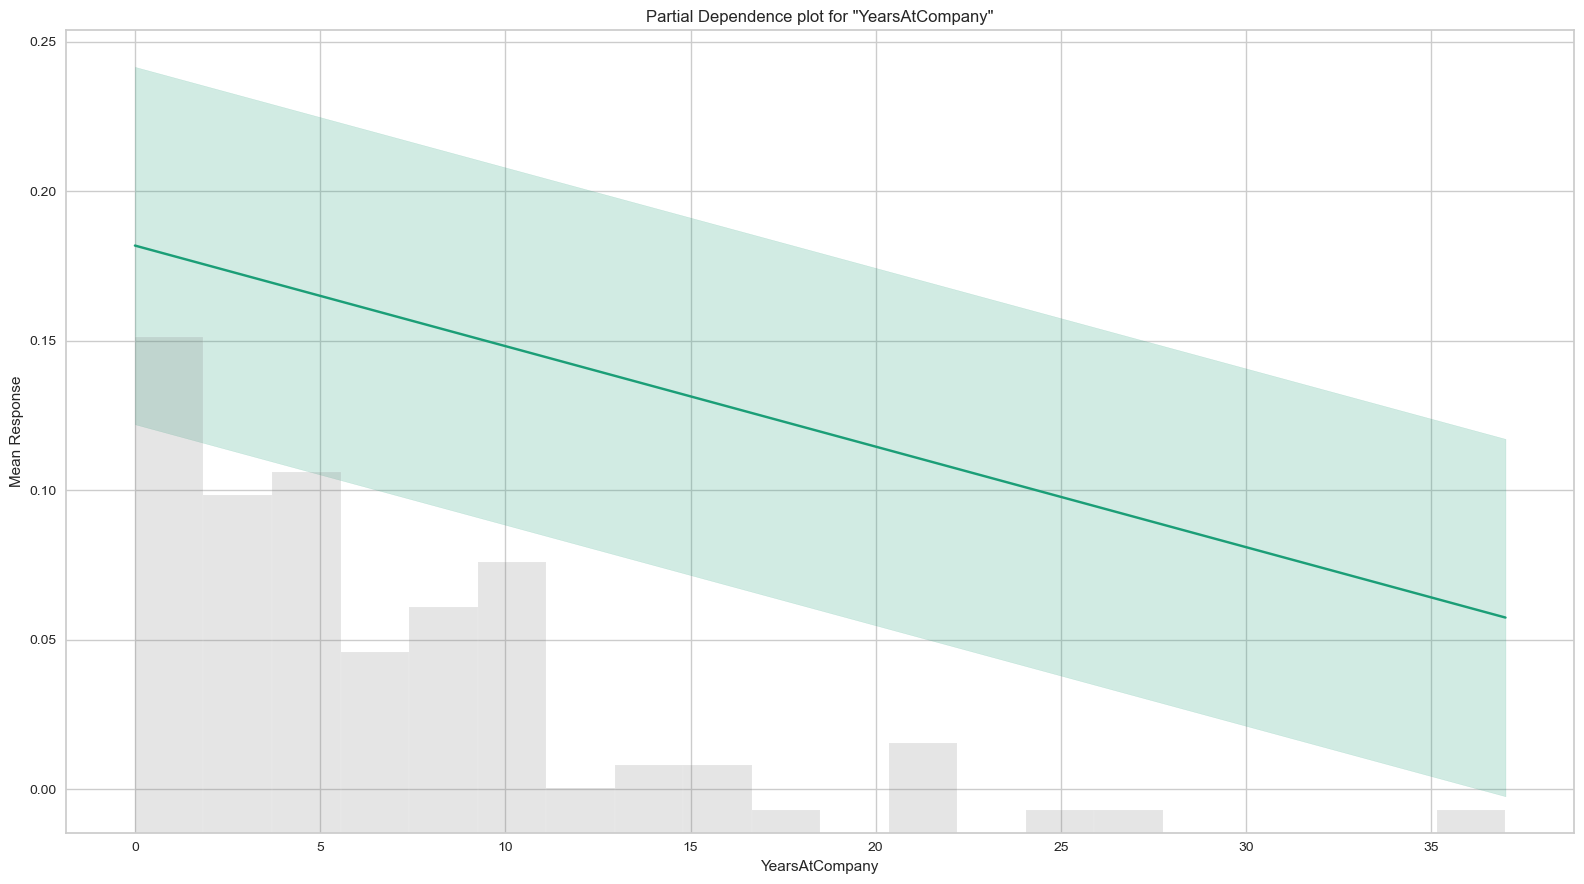

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

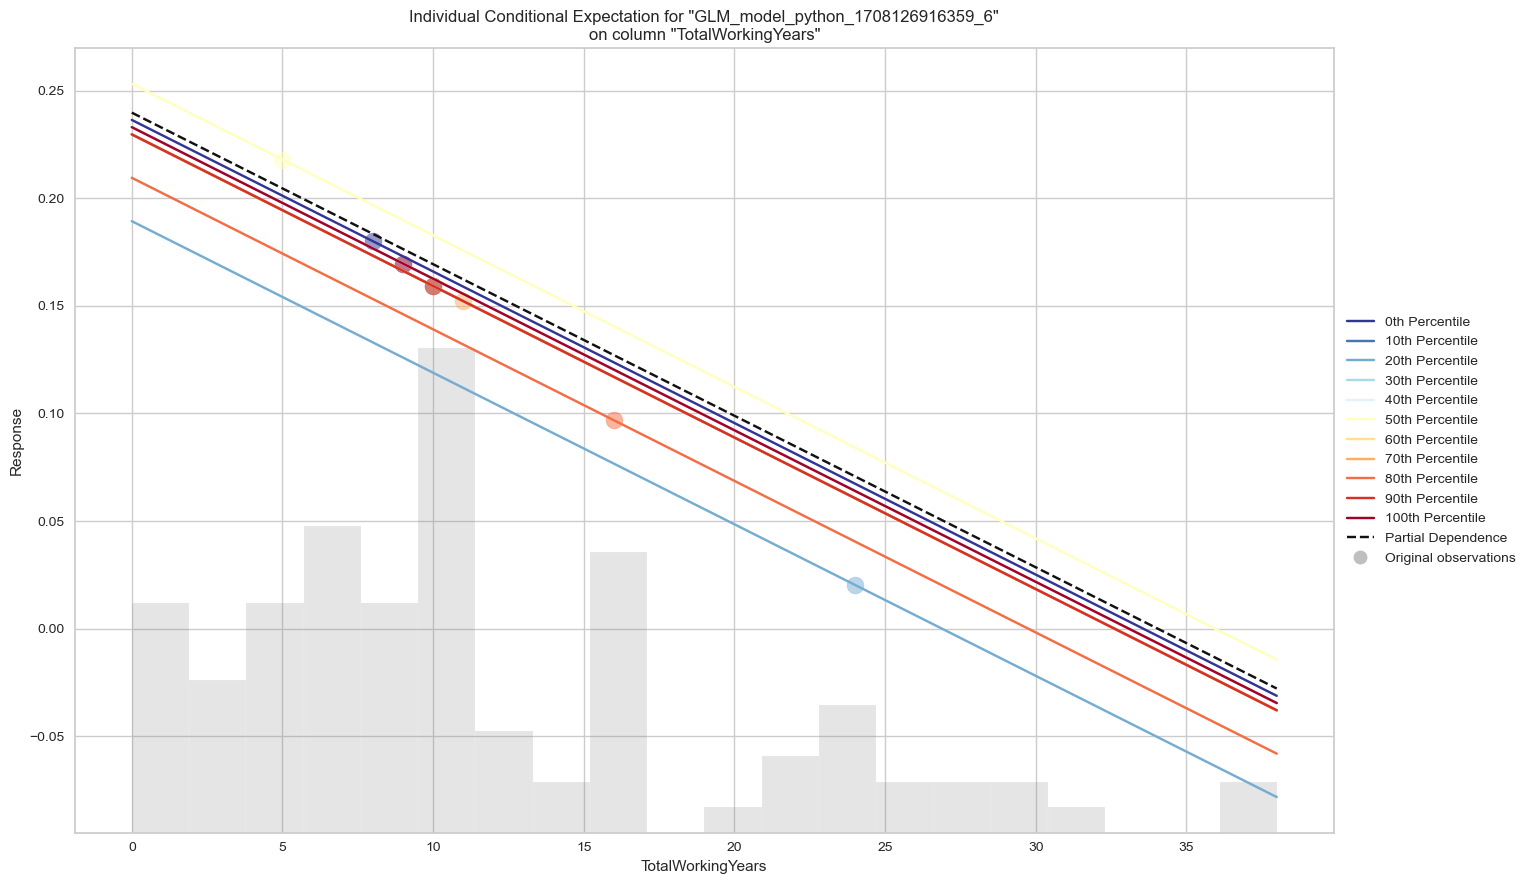

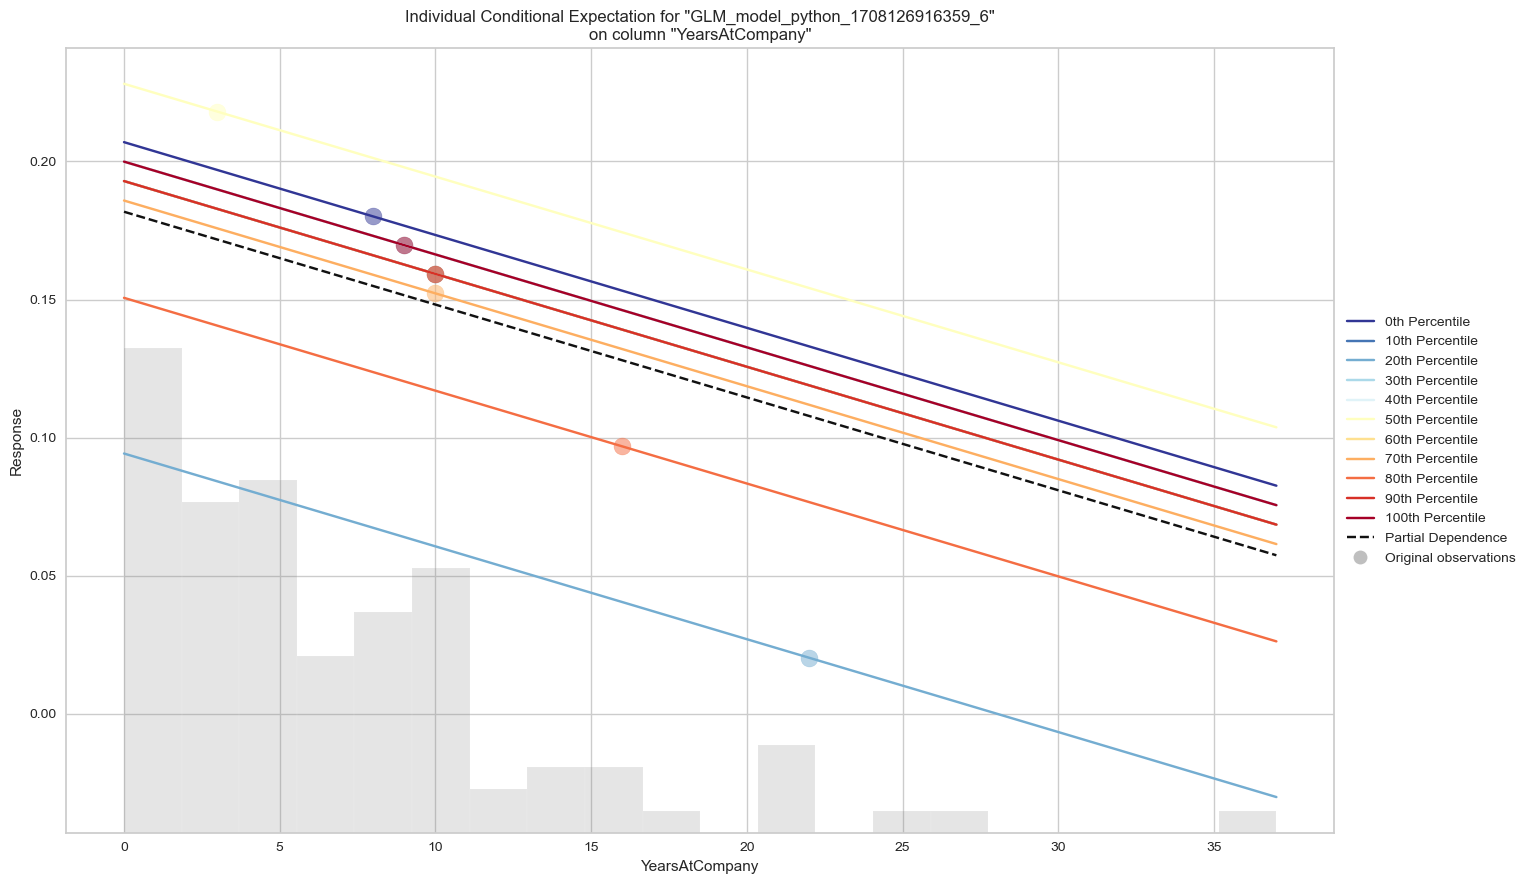

In [38]:
data_glm.explain(train[1:100,:])

The data_glm.explain(train[1:100,:]) command is used to generate an explanation for the GLM (Generalized Linear Model) data_glm on a specific subset of the training data. Let's break down what this command does:

data_glm: This refers to your trained Generalized Linear Model.

.explain(): This is a method provided by the H2O library that is used to generate model explanations. Model explanations are a way to understand why a model makes specific predictions. They help provide insight into the relationship between input features and model predictions.

train[1:100, :]: This is a subset of the training data used for generating the explanation. [1:100, :] means that you are selecting rows 1 to 100 from the training data. This subset of data will be used to explain how the model makes predictions on these specific examples.

When I run this command, it will provide explanations for the model's predictions on the selected subset of the training data. These explanations can take various forms, depending on the library and the model, but common forms of model explanation include feature importance, partial dependence plots, and SHAP (SHapley Additive exPlanations) values.

The specific details of the explanations and how they are presented will depend on the H2O library's implementation and the parameters you set when calling the .explain() method. The goal of using explanations is to gain insights into why the model makes certain predictions, which can be helpful for model interpretation and debugging.

In [39]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,830.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-02-16 18:42:49,0.012 sec,0.0,0.3671063,0.2695340,0.1347670,0.3738347,0.2745194,0.1397524
,2024-02-16 18:42:49,0.035 sec,1.0,0.3652809,0.2681268,0.1334301,0.3720614,0.2730526,0.1384297
,2024-02-16 18:42:49,0.046 sec,2.0,0.3637883,0.2668733,0.1323419,0.3701452,0.2715286,0.1370075
,2024-02-16 18:42:49,0.061 sec,3.0,0.3625305,0.2657846,0.1314284,0.3691836,0.2703165,0.1362965
,2024-02-16 18:42:49,0.074 sec,4.0,0.3614098,0.2646884,0.1306171,0.3681034,0.2691739,0.1355001
,2024-02-16 18:42:49,0.089 sec,5.0,0.3604169,0.2638064,0.1299004,0.3680347,0.2692661,0.1354495
,2024-02-16 18:42:49,0.103 sec,6.0,0.3595446,0.2629038,0.1292724,0.3674027,0.2682611,0.1349847
,2024-02-16 18:42:49,0.113 sec,7.0,0.3587694,0.2621301,0.1287155,0.3674828,0.2681068,0.1350436


The code provided is training a H2OGradientBoostingEstimator (a Gradient Boosting Machine) with the following settings:

balance_classes=True: This setting balances the class distribution in the training data to prevent the model from being biased towards the majority class in a binary classification problem.

ntrees=10: It specifies the number of trees (base learners) in the gradient boosting ensemble. In this case, the model will consist of 10 decision trees.

max_depth=1: This sets the maximum depth of each decision tree in the ensemble. A value of 1 means that the trees will be shallow, with a maximum of one split.

learn_rate=0.1: This is the learning rate, which controls the step size at each iteration when updating the model. A smaller learning rate makes the model converge more slowly but can result in better generalization.

min_rows=2: It specifies the minimum number of rows required in a node to make a split during the tree-building process. This helps to control the tree's complexity.

After specifying these settings, you train the gradient boosting model using the train method. Here's a breakdown of the training parameters:

x=myX: These are the predictor variables (features) used to train the model.

y=myY: This is the target variable (the variable you want to predict).

training_frame=train: This is the training dataset, train, that the model will use to learn patterns.

validation_frame=test: This is the validation dataset, test, that the model will use to assess its performance during training.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

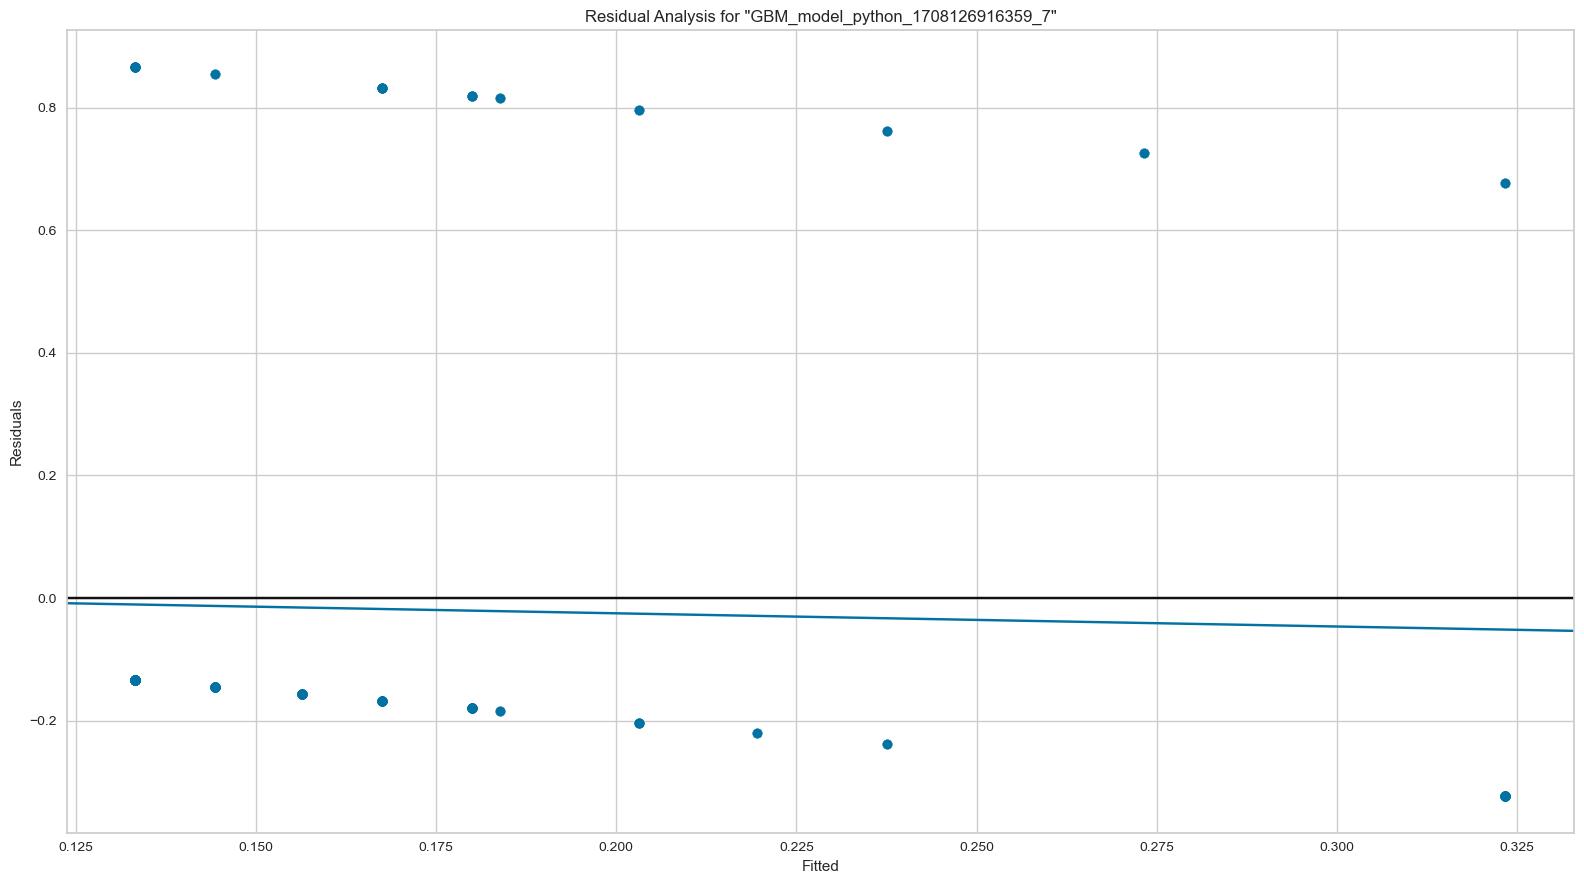

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

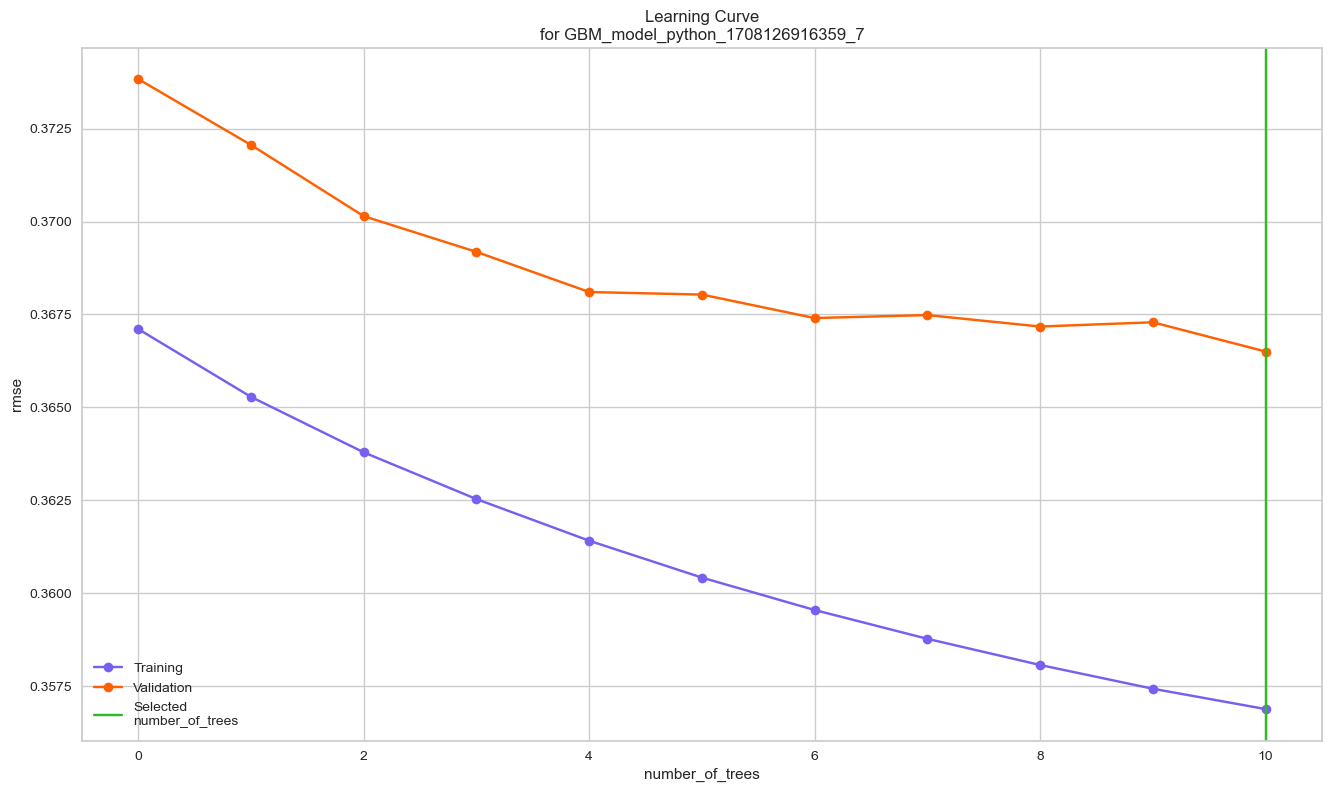

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

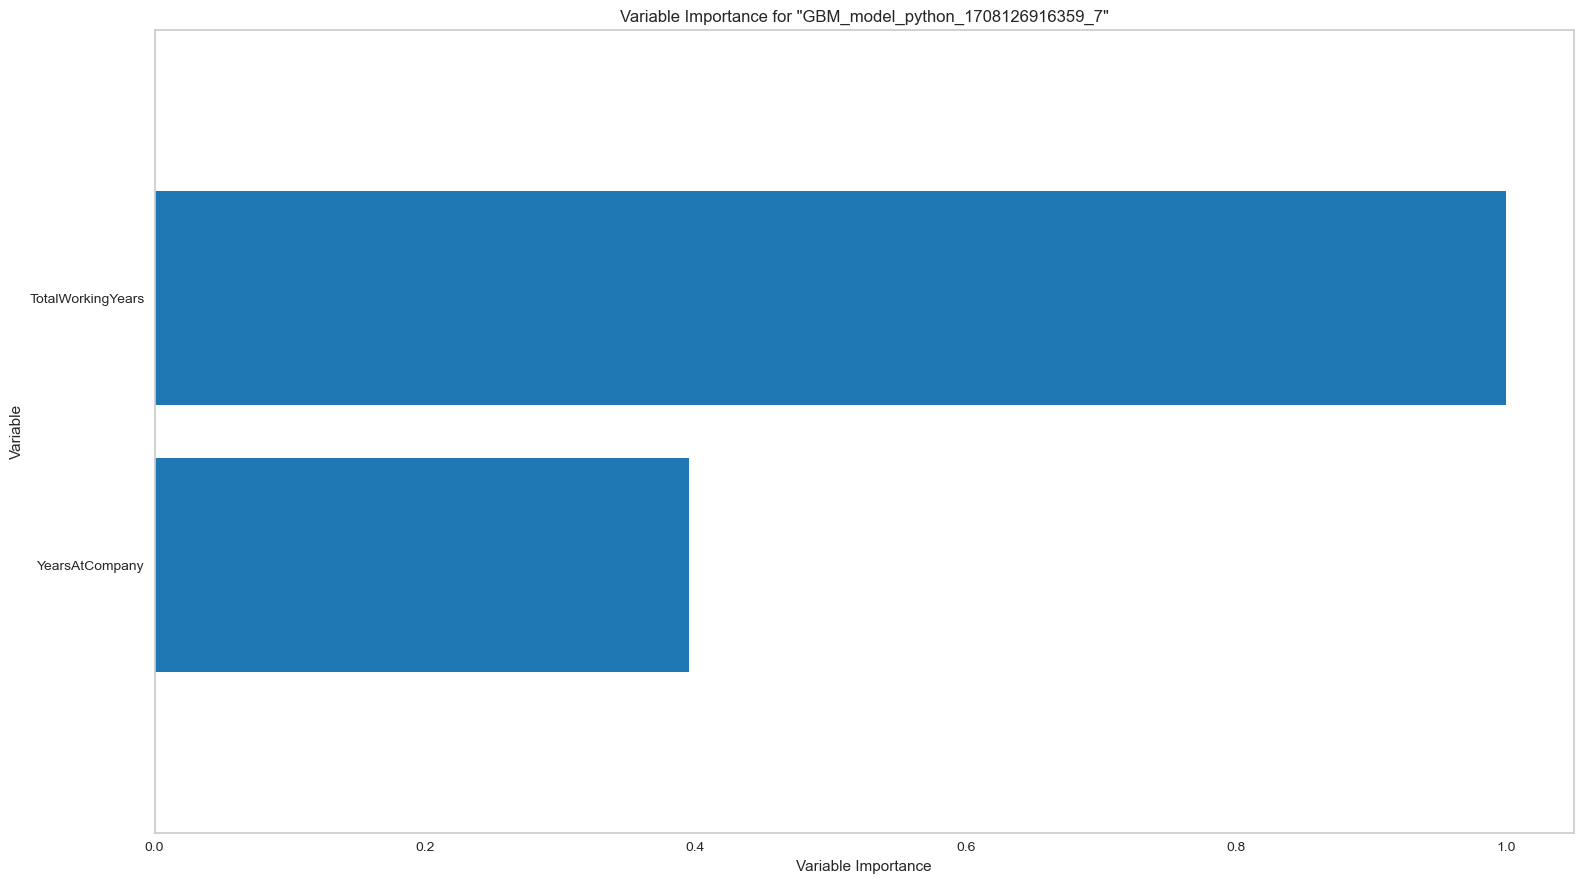

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

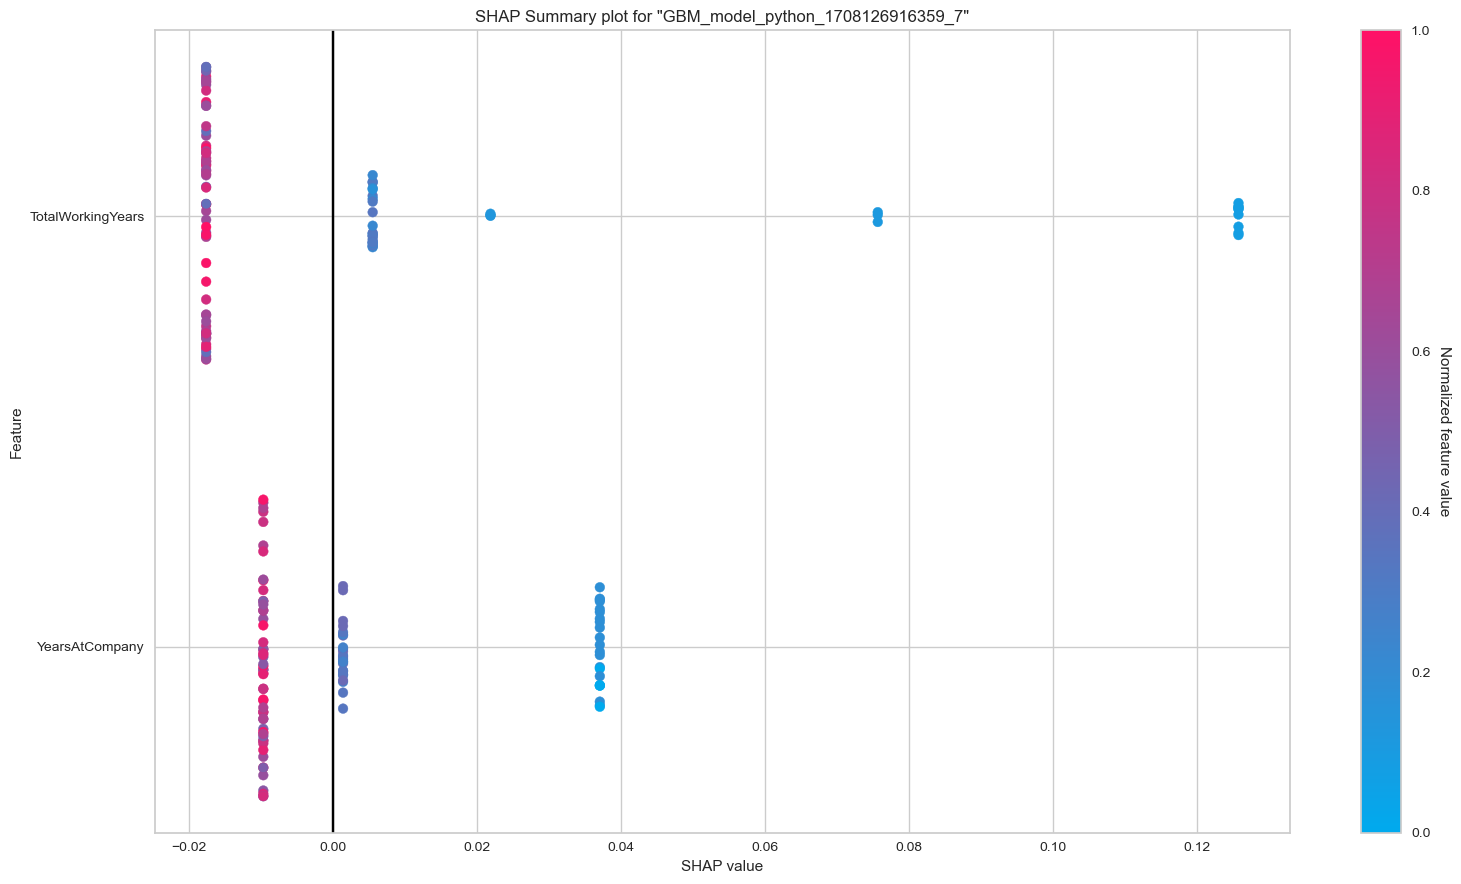

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

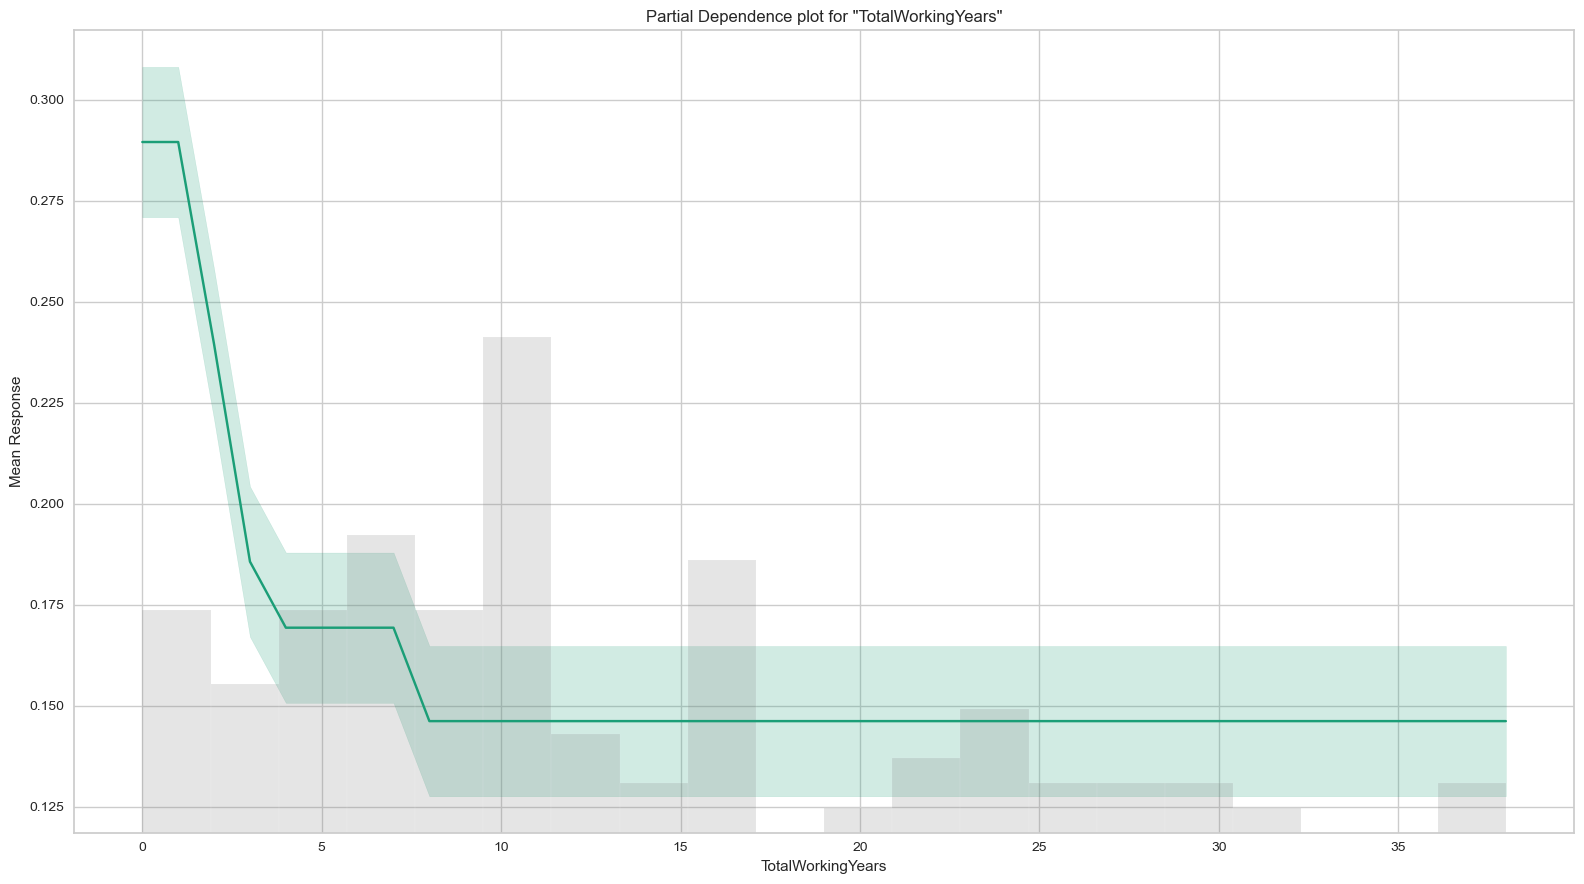

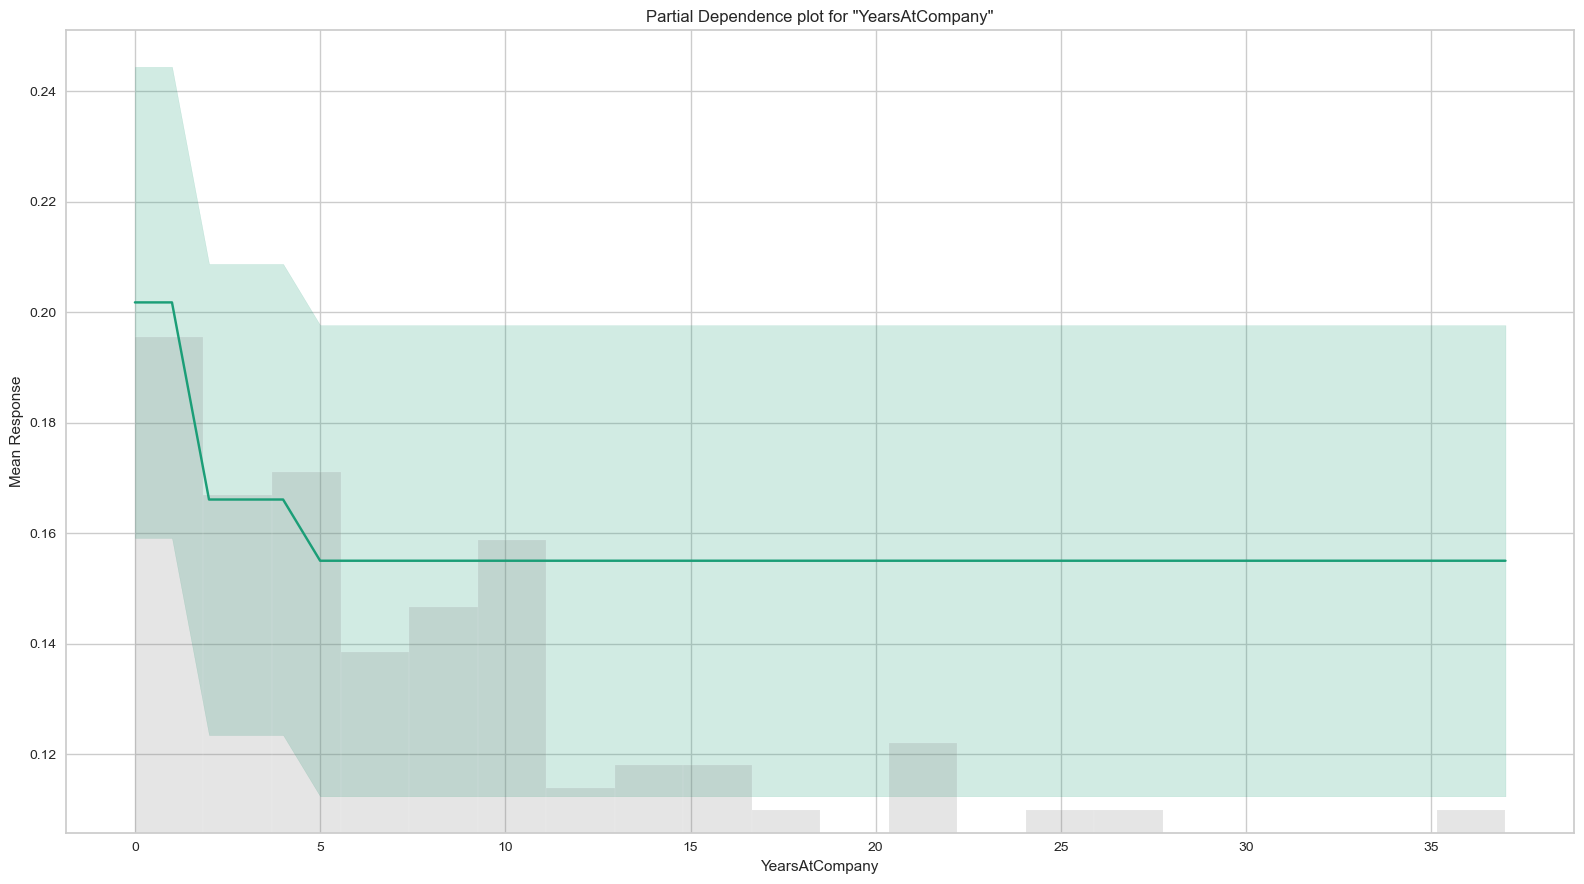

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

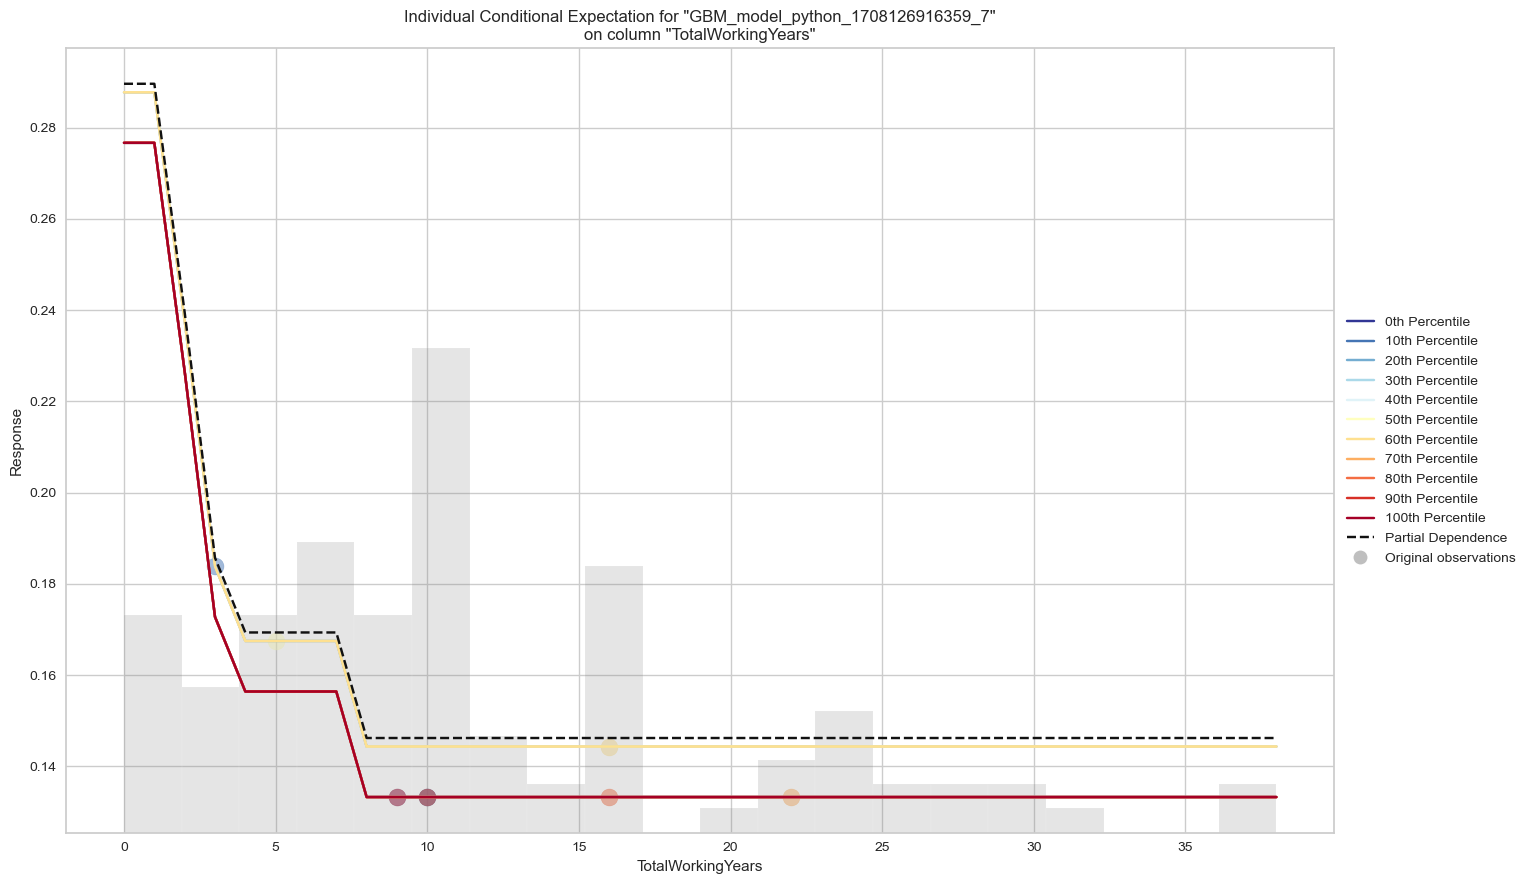

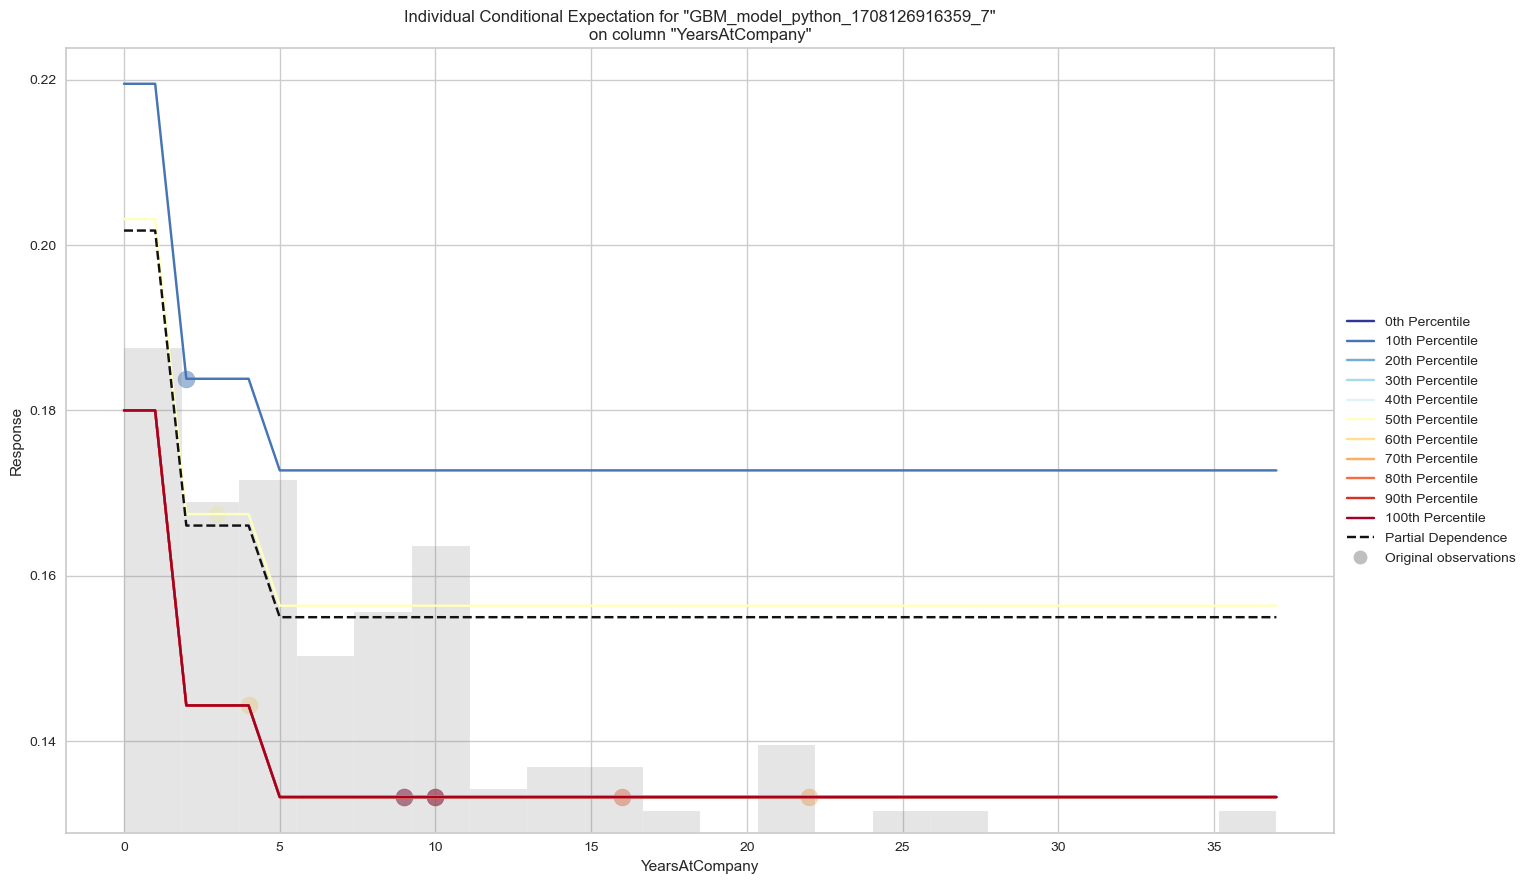

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

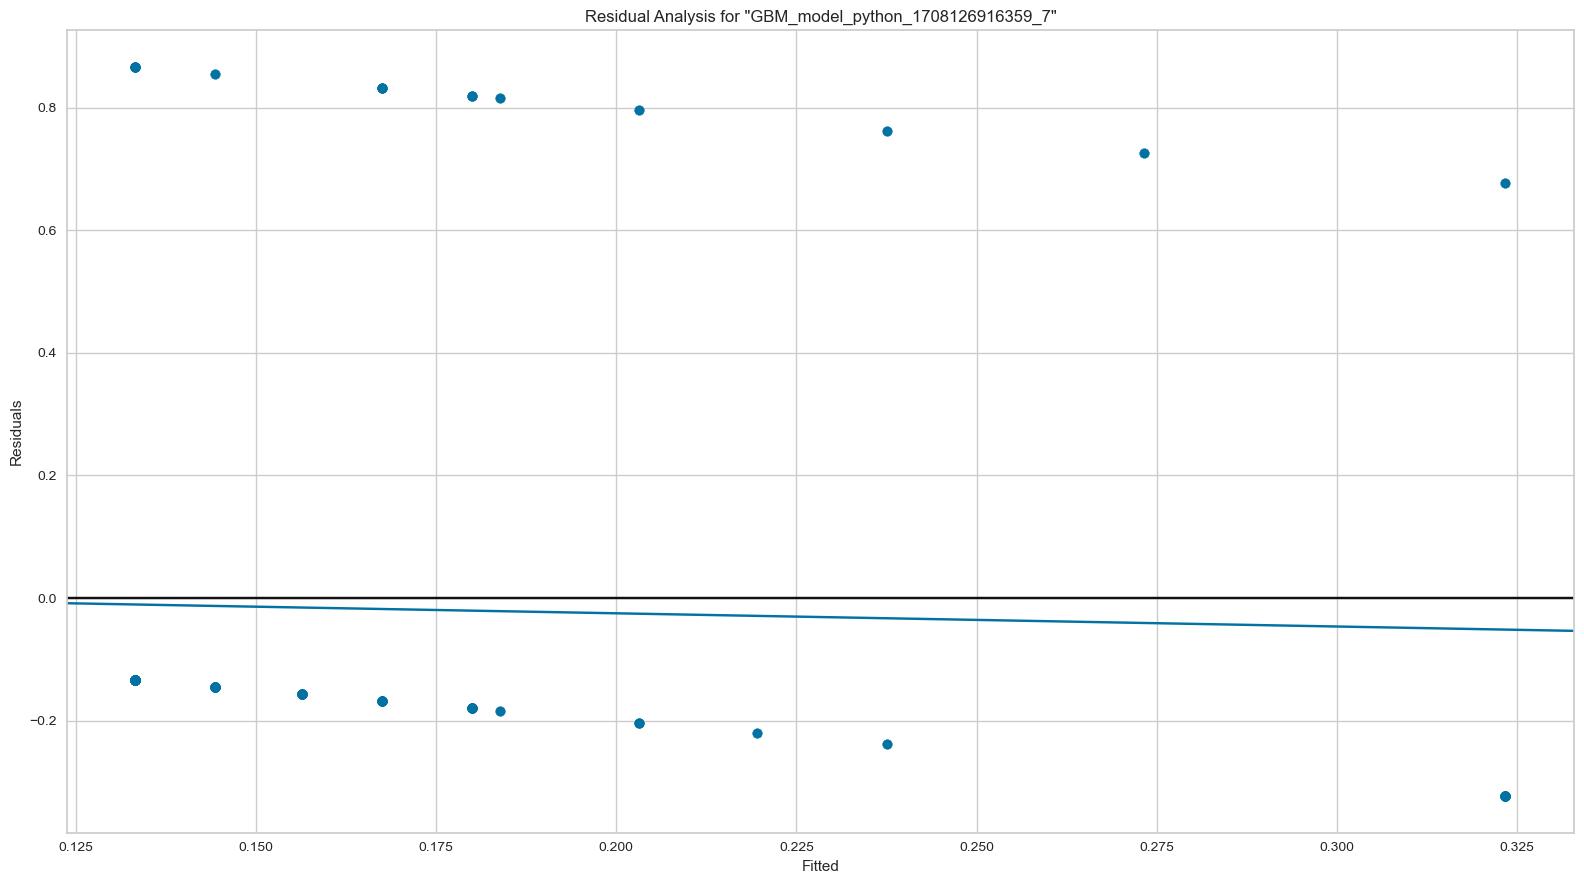

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

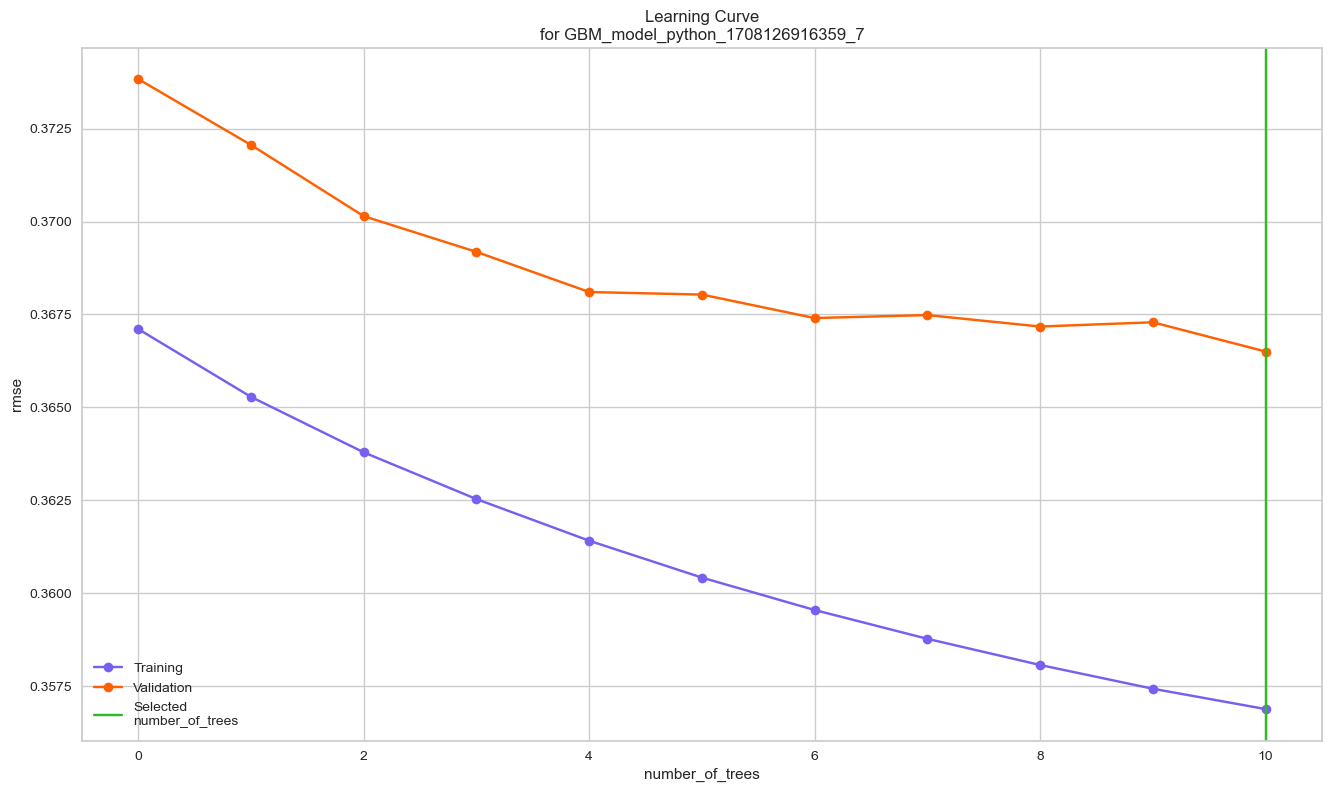

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

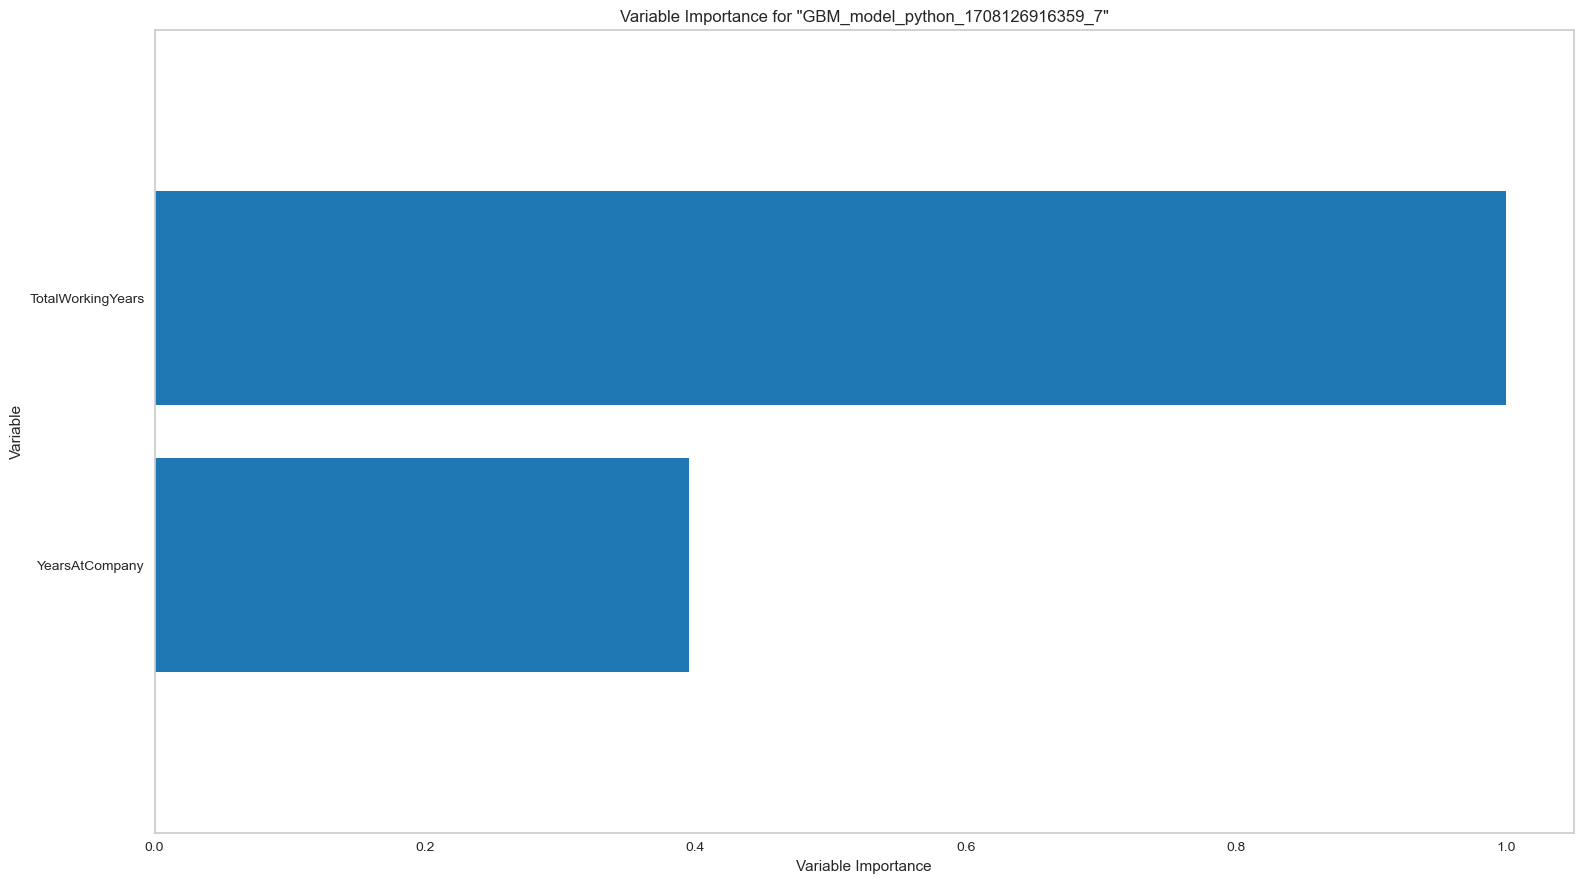

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

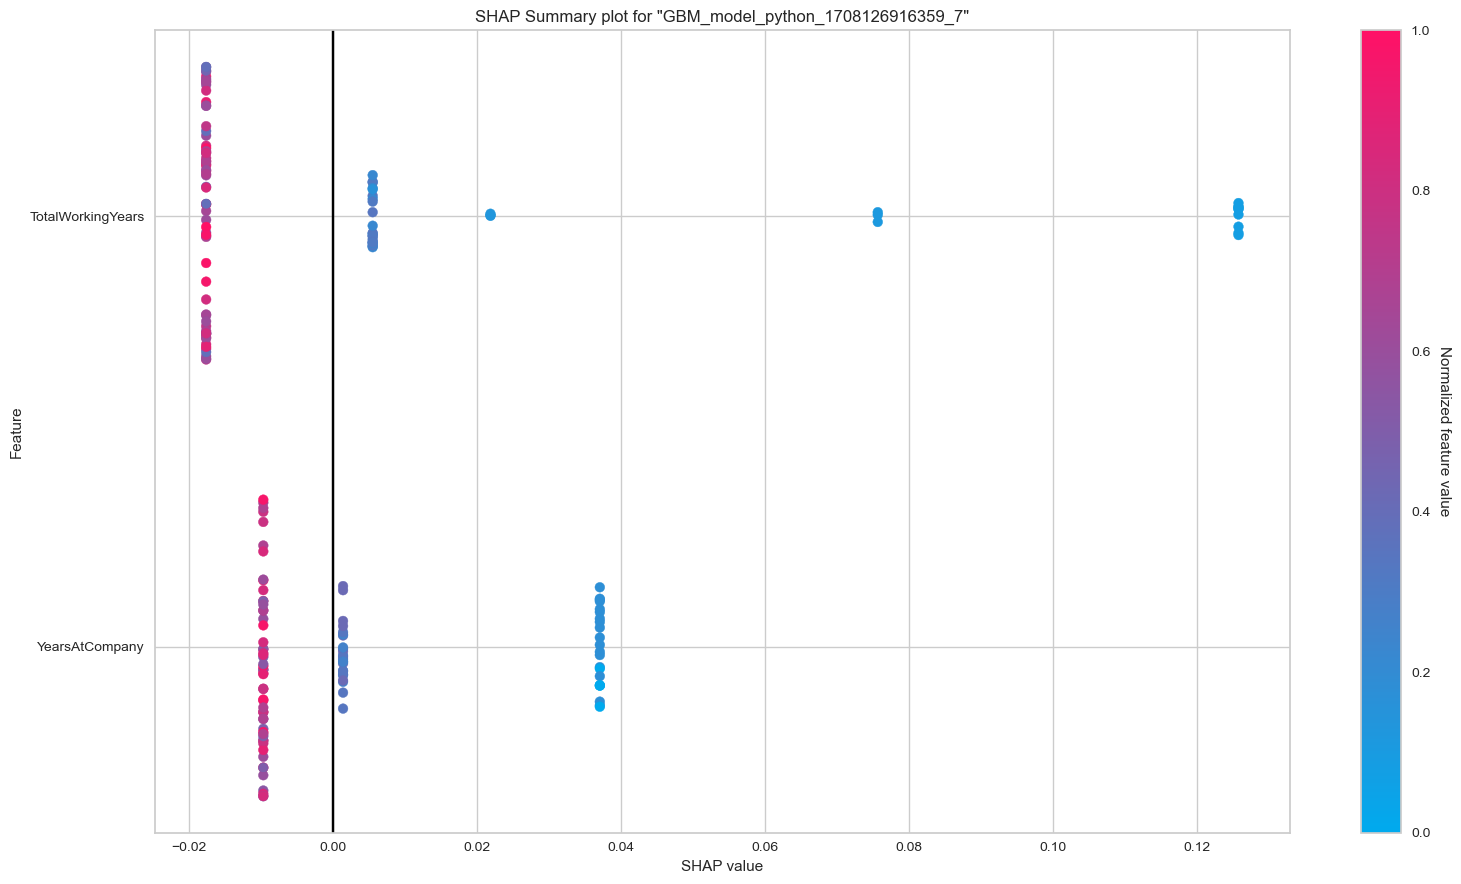

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

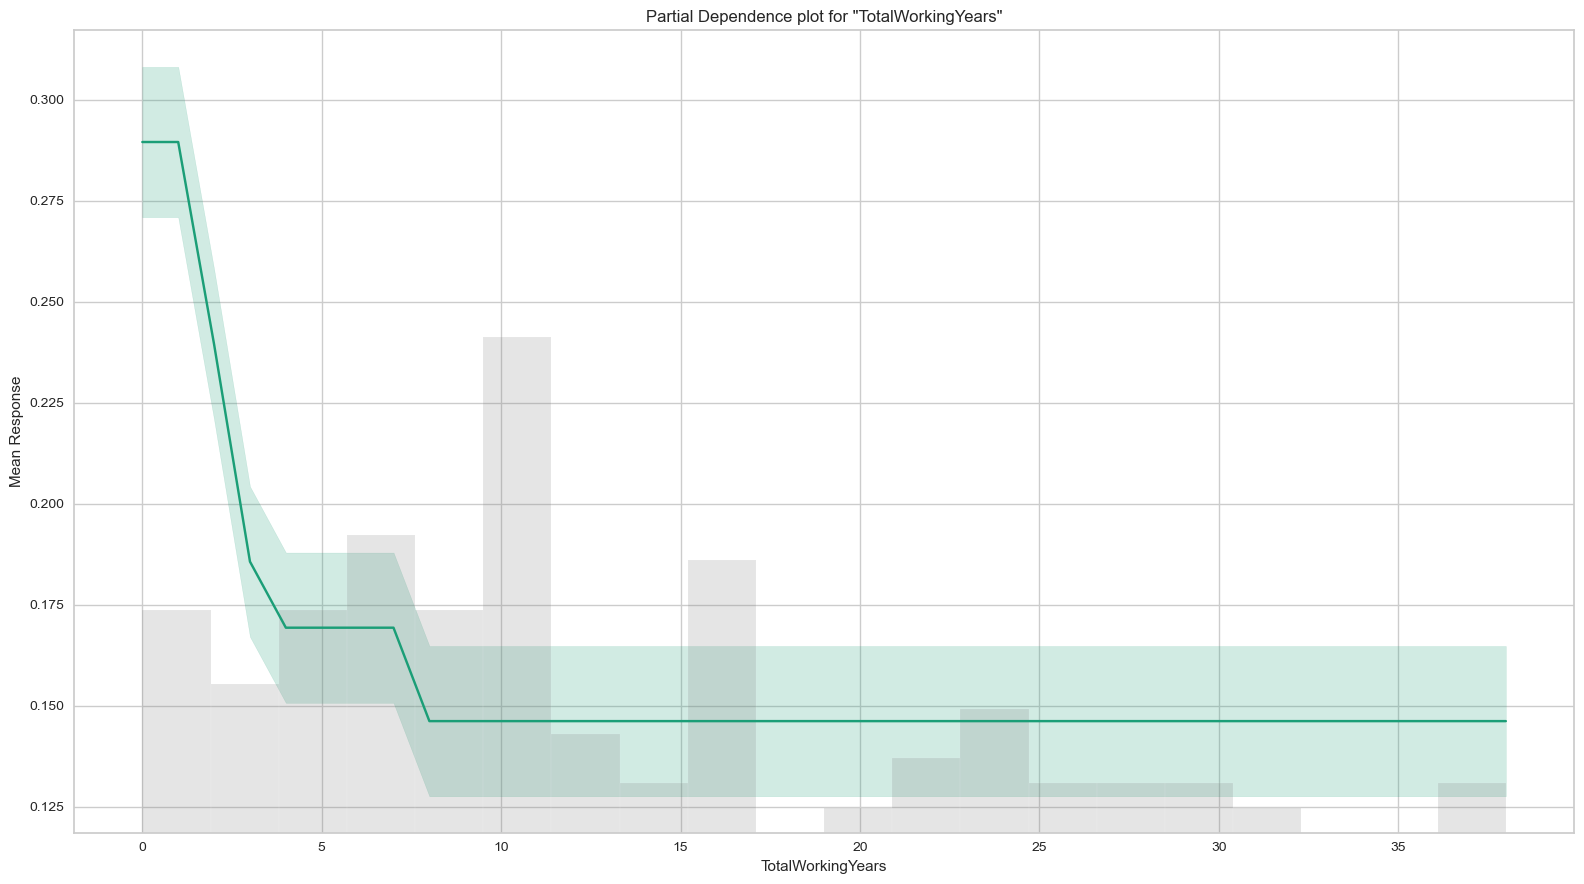

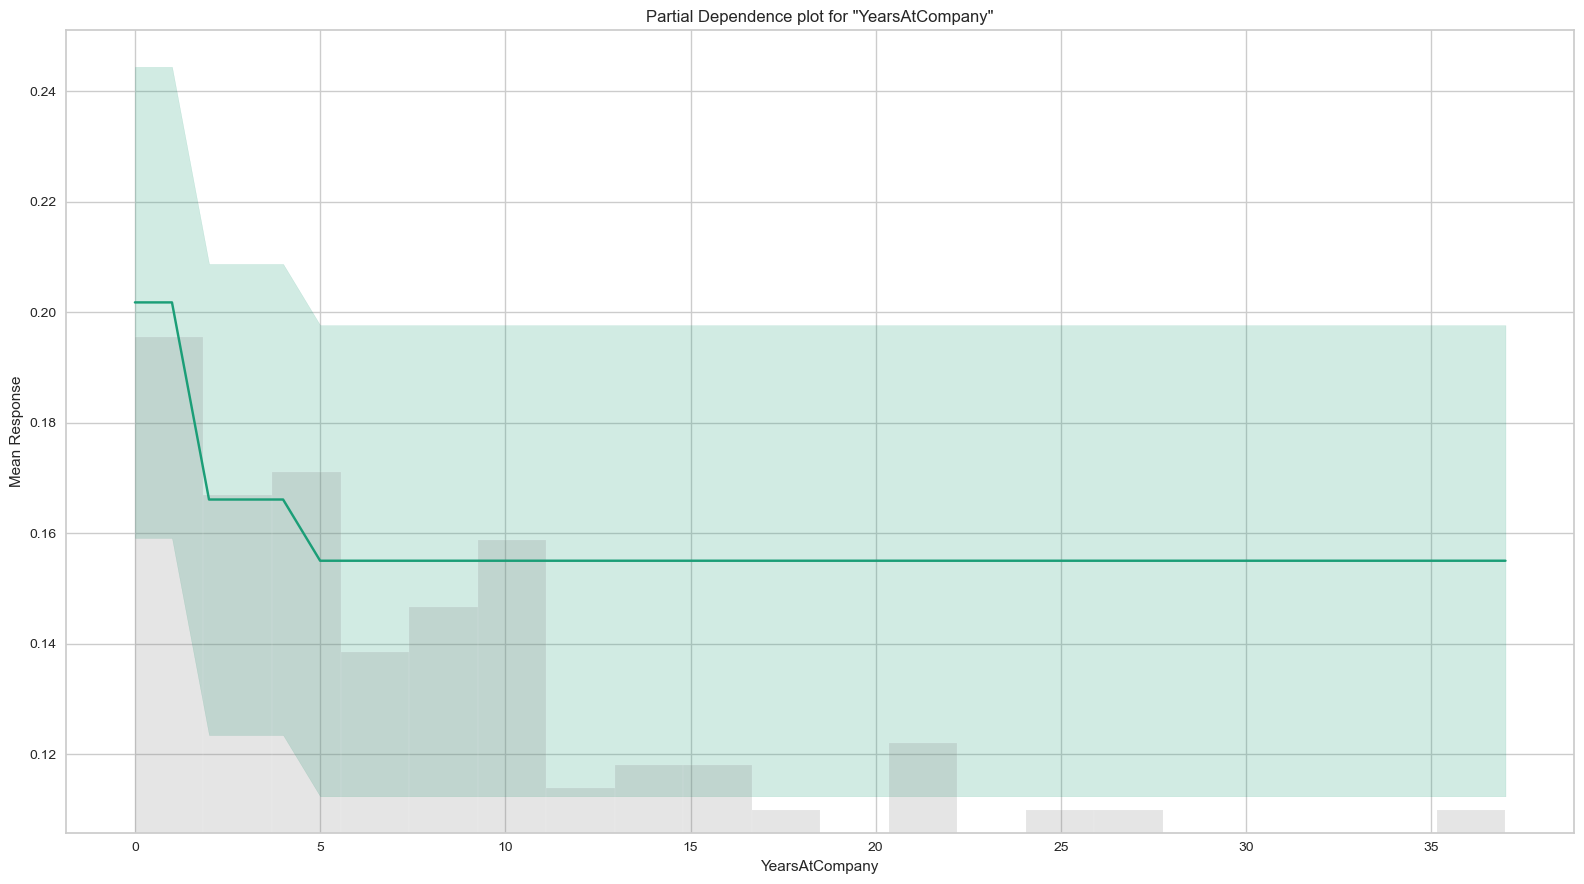

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

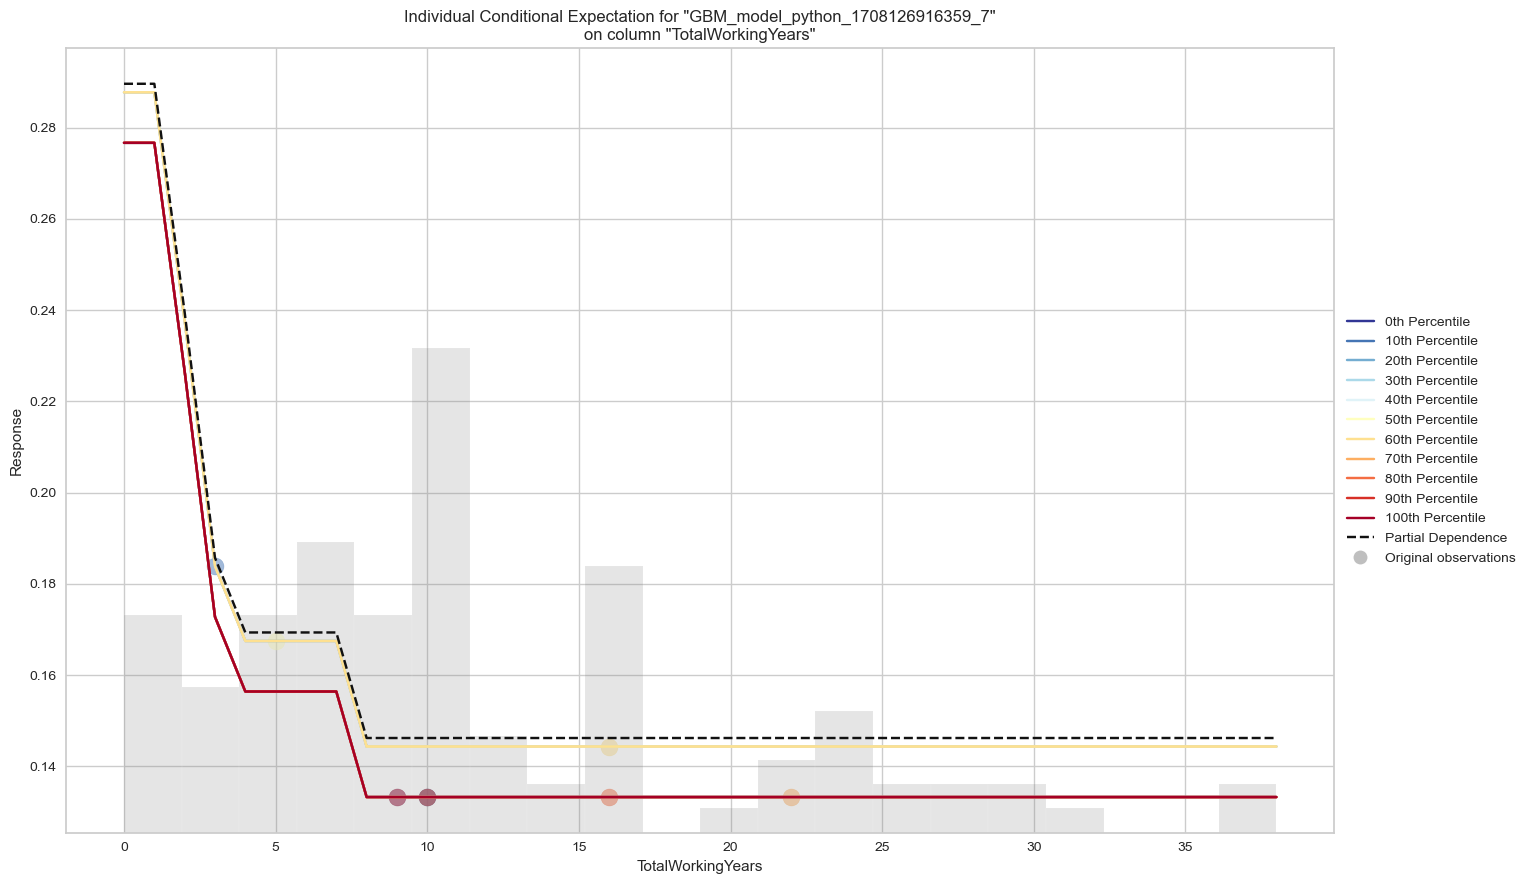

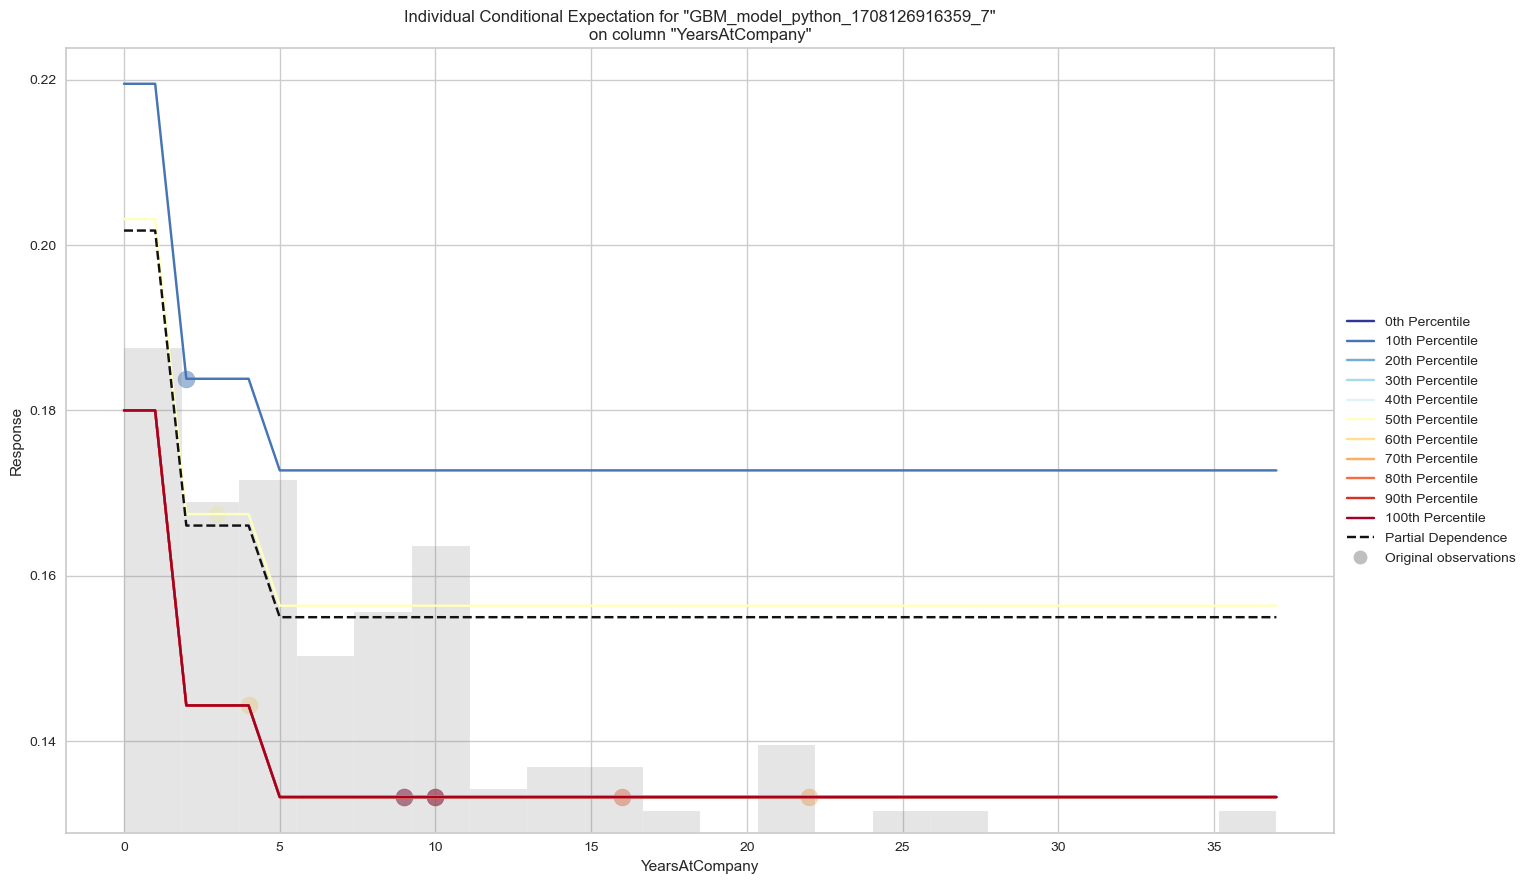

In [40]:
data_gbm.explain(train[0:100,:])

The data_gbm.explain(train[0:100,:]) code is attempting to explain the predictions made by a Gradient Boosting Machine (GBM) model (data_gbm) on the first 100 rows of the training dataset (train).

In this context, "explaining" the predictions typically means providing insights into why the model made specific predictions for the given data points. This explanation might include details on which features (predictor variables) were the most influential in making those predictions.

It's important to note that the explain method used here is specific to the H2O machine learning library, which provides functionalities for interpreting and explaining model results.

Here's what the code does:

data_gbm: This is the GBM model that you trained earlier.

train[0:100, :]: This part selects the first 100 rows of the training dataset (train). The train[0:100, :] notation is used to select the first 100 rows and all columns of the dataset.

When you call data_gbm.explain(train[0:100, :]), the GBM model attempts to provide explanations for the predictions made on this subset of the training data. These explanations might include details on the importance of different features, how they contribute to the predictions, and more.

In [41]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor         |   Normalized Coefficient |
|-------------------+--------------------------|
| Intercept         |                0.16054   |
| TotalWorkingYears |                0.0540433 |
| YearsAtCompany    |                0.0203825 |


The code provided is used to compute and display variable importances from a Generalized Linear Model (GLM) model. It appears to be using the H2O machine learning library for this purpose. Here's a breakdown of what the code does:

from six import iteritems: This line imports the iteritems function from the six module. The iteritems function is used to iterate through the items (key-value pairs) of a dictionary.

glm_varimp = data_glm.coef_norm(): This line computes the normalized coefficients for the GLM model data_glm. Normalized coefficients provide information about the importance and direction of influence of each predictor variable in the model.

The for loop iterates through each key-value pair in the glm_varimp dictionary, and for each item, it takes the absolute value of the coefficient. This is done to ensure that both positive and negative coefficients are considered in the ranking of variable importances.

glm_sorted = sorted(glm_varimp.items(), key=operator.itemgetter(1), reverse=True): This line sorts the items (key-value pairs) in the glm_varimp dictionary based on the absolute values of the coefficients. The reverse=True argument sorts the items in descending order, so the most important variables will be listed first.

table = tabulate(glm_sorted, headers=["Predictor", "Normalized Coefficient"], tablefmt="orgtbl"): This code formats the sorted items into a tabular structure using the tabulate function. The table will have two columns: "Predictor" and "Normalized Coefficient."

print("Variable Importances:\n\n" + table): Finally, this line prints the variable importances table, which provides insights into which predictors had the most influence on the GLM model's predictions.

This code is useful for understanding the importance of predictor variables in your GLM model, which can be valuable for feature selection and model interpretation. The Normalized Coefficient values represent the strength and direction of the relationship between each predictor and the target variable. The higher the absolute value, the more important the predictor is in making predictions.

In [42]:
# Importance ofthe variables for the glm model
data_glm.varimp()

[('TotalWorkingYears', 0.05404330790042877, 1.0, 0.7261362712929448),
 ('YearsAtCompany',
  0.020382540300488472,
  0.37715197482067453,
  0.2738637287070552)]

In [43]:
# Importance ofthe variables for the gbm model
data_gbm.varimp()

[('TotalWorkingYears', 37.228816986083984, 1.0, 0.7166085048123181),
 ('YearsAtCompany',
  14.722585678100586,
  0.39546208743629546,
  0.2833914951876819)]

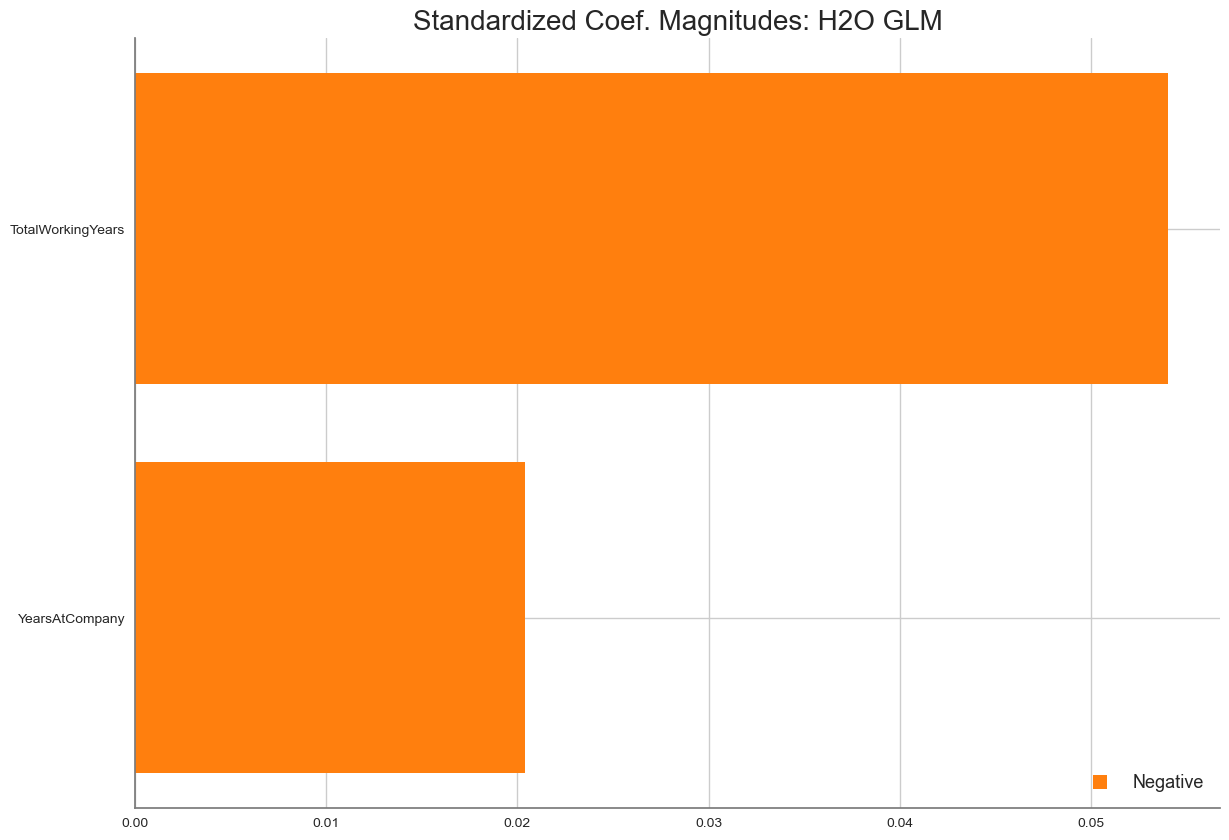

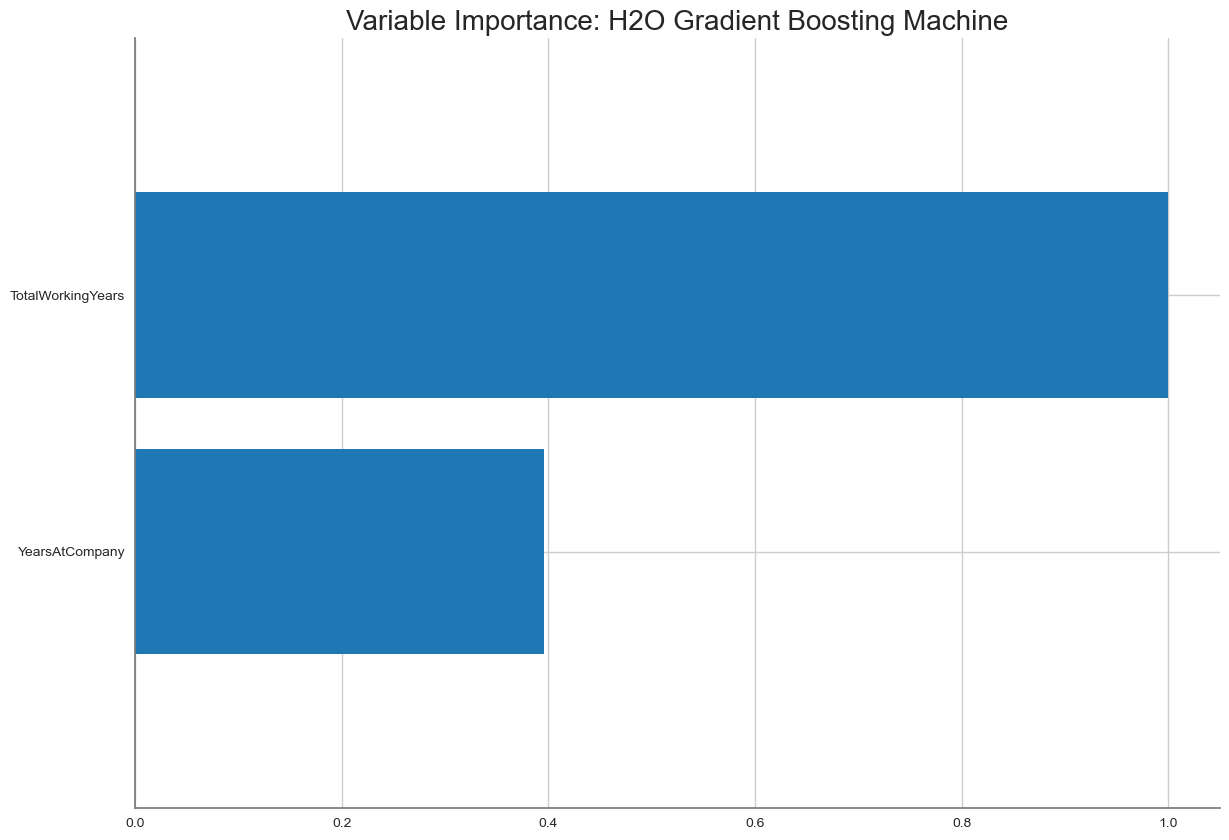

<Figure size 800x550 with 0 Axes>

In [44]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

data_glm.std_coef_plot(): This function is used when you have trained a GLM model. It generates a plot that displays the standardized coefficients of the predictor variables in the GLM. Standardized coefficients are coefficients that have been scaled to have a mean of 0 and a standard deviation of 1. This can help you compare the relative importance and impact of each predictor variable on the model's output.

High absolute values of standardized coefficients indicate a stronger influence on the model's predictions. Positive coefficients indicate a positive relationship with the response variable, while negative coefficients indicate a negative relationship.

data_gbm.varimp_plot(): This function is used when you have trained a Gradient Boosting Model (GBM). It generates a plot that visualizes the variable importances for the predictor variables in the GBM. Variable importances reflect the relative contribution of each predictor variable to the model's performance.

Variables with higher importances are more influential in making predictions, while those with lower importances have less impact. The plot typically shows a ranking of variables by importance, allowing you to identify the most significant predictors.

In [45]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1343237581923981
RMSE: 0.36650205755547693
MAE: 0.2667682992998919
RMSLE: 0.2556513239402134
Mean Residual Deviance: 0.1343237581923981

The data_gbm.model_performance(test) function in the H2O machine learning library is used to evaluate the performance of a Gradient Boosting Model (GBM) on a specific test dataset. When you pass the test dataset as an argument to this function, it computes various metrics to assess how well the GBM model is performing on unseen data.

By examining the output of data_gbm.model_performance(test), you can assess how well the GBM model generalizes to new, unseen data. This information is crucial for understanding the model's predictive power and making decisions about its deployment in real-world applications.

In [46]:
# Model performance of GLM model on test data
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.14197274760245296
RMSE: 0.3767927117162074
MAE: 0.27266376984662316
RMSLE: 0.26632219442308047
Mean Residual Deviance: 0.14197274760245296
R^2: -0.016280129576826896
Null degrees of freedom: 136
Residual degrees of freedom: 134
Null deviance: 19.14607327750915
Residual deviance: 19.450266421536057
AIC: 129.34869643945805

The data_glm.model_performance(test) function in the H2O machine learning library is used to evaluate the performance of a Generalized Linear Model (GLM) on a specific test dataset. When you pass the test dataset as an argument to this function, it computes various metrics to assess how well the GLM model is performing on unseen data.

By examining the output of data_glm.model_performance(test), you can assess how well the GLM model generalizes to new, unseen data. This information is crucial for understanding the model's predictive power and making decisions about its deployment in real-world applications.

In [47]:
#The get_independent_variables function is designed to extract the independent (predictor) variables from a given DataFrame,
#df, while excluding the target variable, targ, and the variable named 'Level'. 
#It also categorizes the independent variables into different types: integers, enumerations (categorical variables), and real numbers (floats).
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='Attrition']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

Type Markdown and LaTeX:  𝛼2

In [48]:
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['TotalWorkingYears', 'YearsAtCompany']
Attrition


In [49]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [50]:
import time
from h2o.automl import H2OAutoML

# Start the model and train the model
model_start_time = time.time()

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=X, y=myY, training_frame=train)


AutoML progress: |
18:47:19.813: AutoML: XGBoost is not available; skipping it.
18:47:19.961: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


18:47:20.662: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


18:47:21.724: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
18:47:23.25: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical be

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240216_184719_model_2


Status of Neuron Layers: predicting Attrition, regression, gaussian distribution, Quadratic loss, 201 weights/biases, 5.9 KB, 6,278,430 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  ------------------  --------------------  -----------------------
    1        2        Input             20.0
    2        50       RectifierDropout  40.0       0.0   0.0   0.01701287669755402   0.04337424039840698   0.0         -0.19030348262924235  0.7050588130950928  -0.5850840285039933   0.7993650436401367
    3        1        Linear                       0.0   0.0   0.016386302834143864  0.015494156628847122  0.0         -0.20477362632751464  0.6143643856048584  -0.07909222615035363  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.1264206324021283
RMSE: 0.3555567920911205
MAE: 0.24352256673510733
RMSLE: 0.24610764841508526
Mean Residual Deviance: 0.1264206324021283

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.12571111470121307
RMSE: 0.3545576324114502
MAE: 0.25452426647499515
RMSLE: 0.2487563921128516
Mean Residual Deviance: 0.12571111470121307

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.254505   0.017686    0.271094      0.245485      0.273125      0.231287      0.251533
mean_residual_deviance  0.125696   0.0104973   0.130531      0.127312      0.13943       0.112255      0.118952
mse                     0.125696   0.0104973   0.130531      0.127312      0.13943       0.112255      0.118952
r2                      0.0661917  0.02192     0.0516262     0.0577335     0.0694764     0.102825      0.049297
residual_deviance       0.125696   0.0104973   0.130531      0.127312      0.13943       0.112255      0.118952
rmse                    0.354288   0.0148271   0.361291      0.356807      0.373404      0.335044      0.344894
rmsle                   0.248616   0.00892329  0.254664      0.24882       0.259503      0.237179      0.242911

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2024-02-16 18:48:55  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2024-02-16 18:48:55  1 min 25.215 sec  190428 obs/sec    10        1             13330        0.358943         0.12884              0.28228         0.0439816
    2024-02-16 18:49:00  1 min 30.233 sec  540228 obs/sec    2060      206           2.74598e+06  0.35842          0.128465             0.284993        0.0467604
    2024-02-16 18:49:05  1 min 35.241 sec  573418 obs/sec    4340      434           5.78522e+06  0.35573          0.126544             0.271204        0.0610165
    2024-02-16 18:49:06  1 min 36.054 sec  576055 obs/sec    4710      471           6.27843e+06  0.355557         0.126421             0.243523        0.0619318

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
YearsAtCompany     1     

Evaluation Explanation
We have implemented the following commands to find the time required and get the accuracy of the model through cross validation as well as scoring history these two tables in the output all values as root mean square, residual deviance and timestamps,and avoid the overfitting of the data while implementing algorithms. we have explained the evaluation through conclusion and the cross validation and splitting of data was also usedin train and test data.

In [52]:
#Calculate the total execution time required by the model
execution_time = time.time() - model_start_time
print(execution_time)

573.9827165603638


In [53]:
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240216_184719_model_2     0.354558  0.125711  0.254524  0.248756                  0.125711
StackedEnsemble_AllModels_1_AutoML_1_20240216_184719     0.354875  0.125936  0.252038  0.248806                  0.125936
StackedEnsemble_BestOfFamily_1_AutoML_1_20240216_184719  0.355298  0.126237  0.252499  0.248914                  0.126237
GBM_1_AutoML_1_20240216_184719                           0.355358  0.126279  0.252529  0.249015                  0.126279
DeepLearning_grid_3_AutoML_1_20240216_184719_model_1     0.355384  0.126298  0.260227  0.251307                  0.126298
DeepLearning_grid_2_AutoML_1_20240216_184719_model_1     0.355558  0.126422  0.263     0.250564                  0.126422
GBM_grid_1_AutoML_1_20240216_184719_model_4              0.356198  0.126877  0.253855  0.249988                  0.126877
GBM_grid_1_AutoML_1_2024

These metrics are used to evaluate different machine learning models, and the lower the values for RMSE, MSE, MAE, RMSLE, and mean_residual_deviance, the better the model's performance.

The table appears to show the evaluation results for multiple models, possibly for model selection or hyperparameter tuning to choose the best-performing model for a given problem. The model with the lowest RMSE, MSE, MAE, RMSLE, or mean_residual_deviance is typically considered the best model for the task at hand.

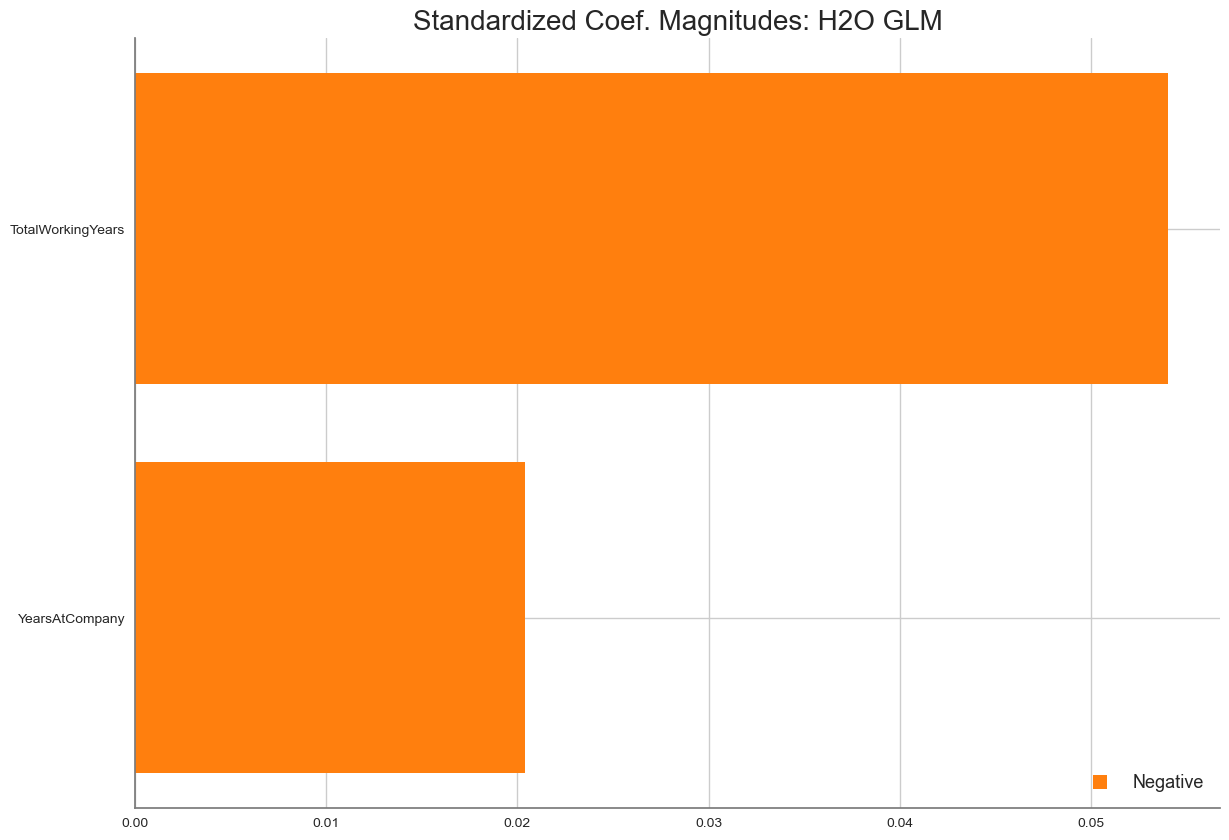

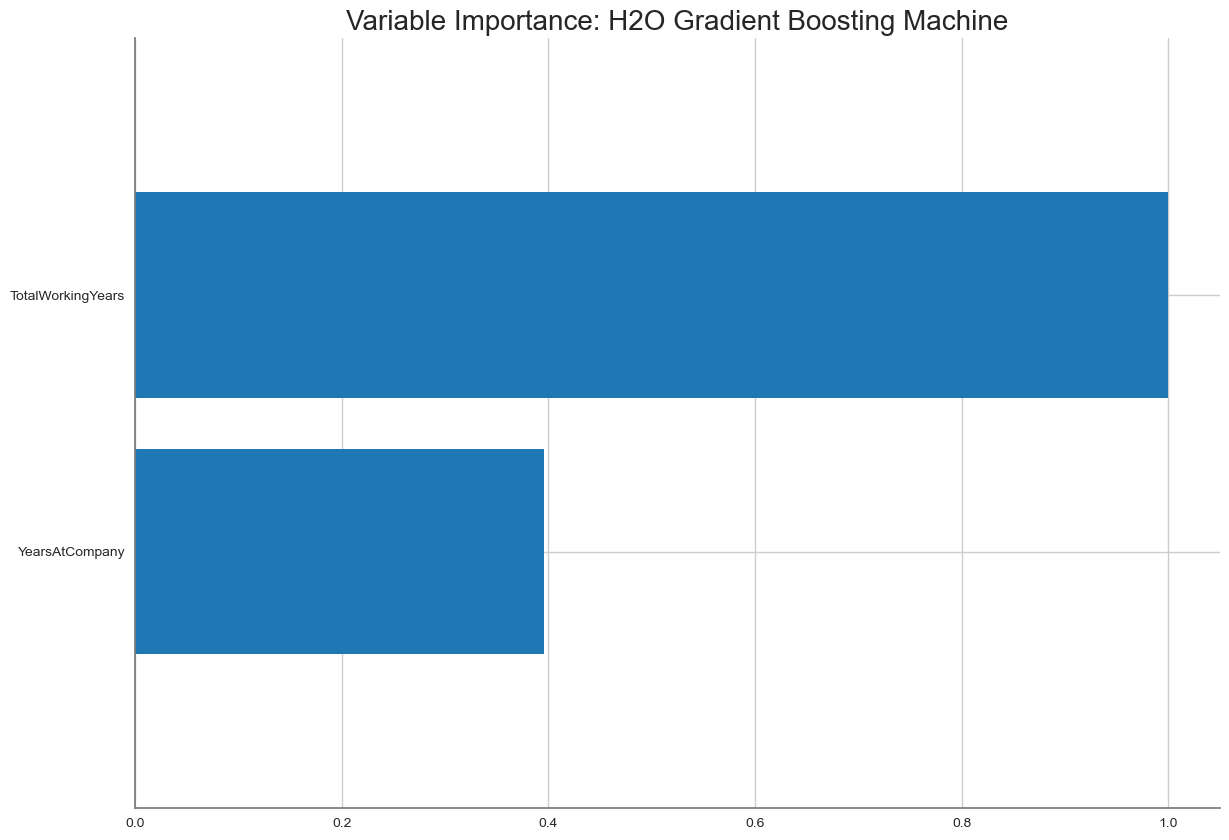

<Figure size 800x550 with 0 Axes>

In [99]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [100]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [101]:
best_model.algo

'stackedensemble'

stackedensemble model is the best model for the Auto ML

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 14 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_LENOVO_koqs9w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.917 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
20:44:36.408: AutoML: XGBoost is not available; skipping it.
20:44:36.412: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]
20:44:37.847: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]
20:44:41.278: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]

██
20:44:45.260: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]

███
20:44:48.936: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]
20:44:51.991: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]

███
20:44:55.396: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]

███
20:45:00.153: _train param, Dropping bad and constant columns: [StandardHours, EmployeeCoun

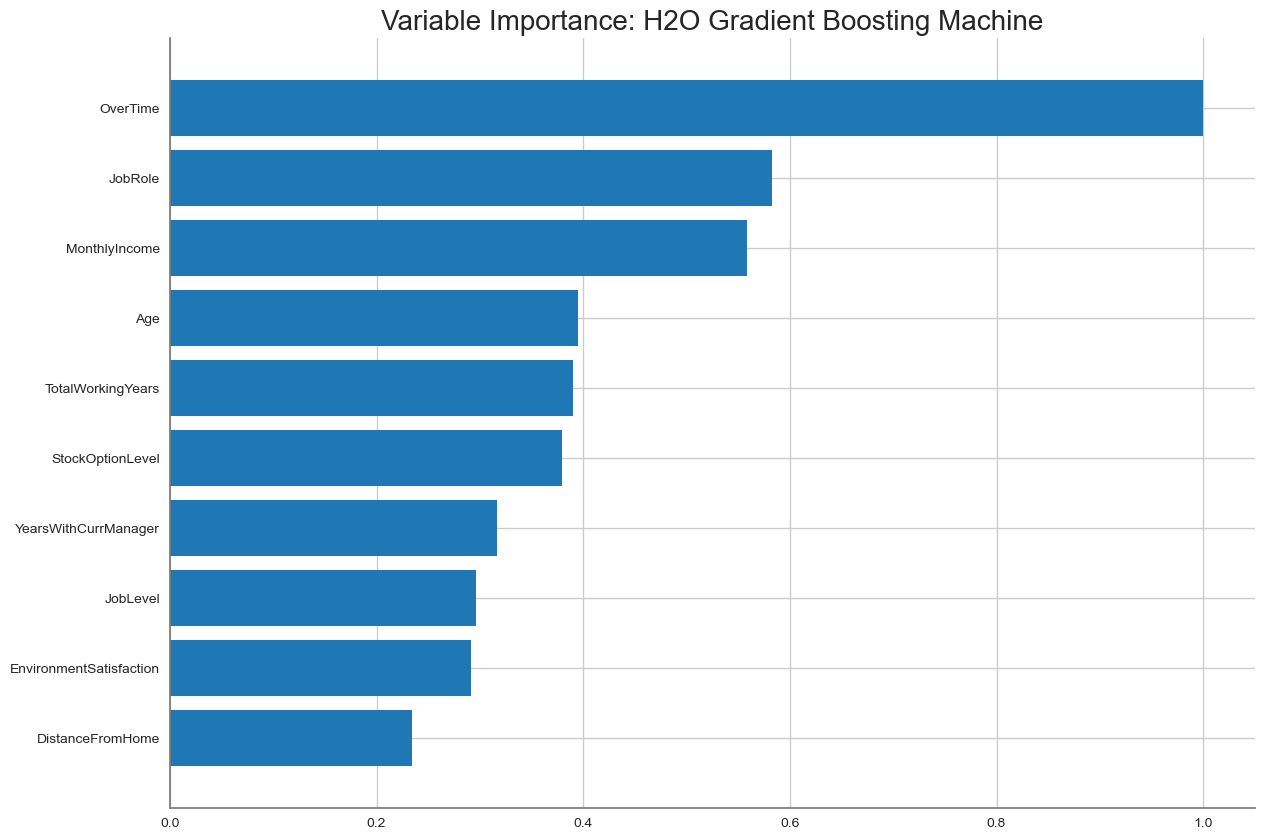

<Figure size 800x550 with 0 Axes>

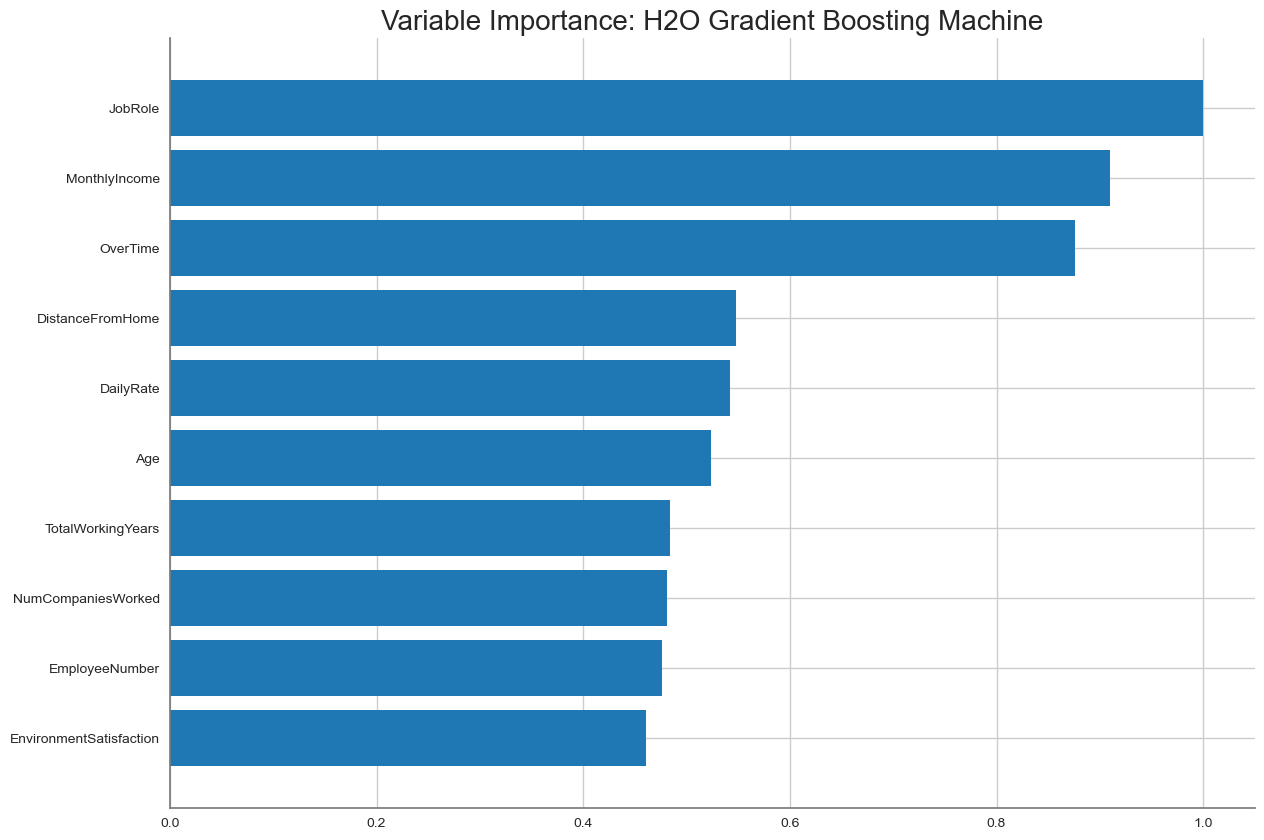

<Figure size 800x550 with 0 Axes>

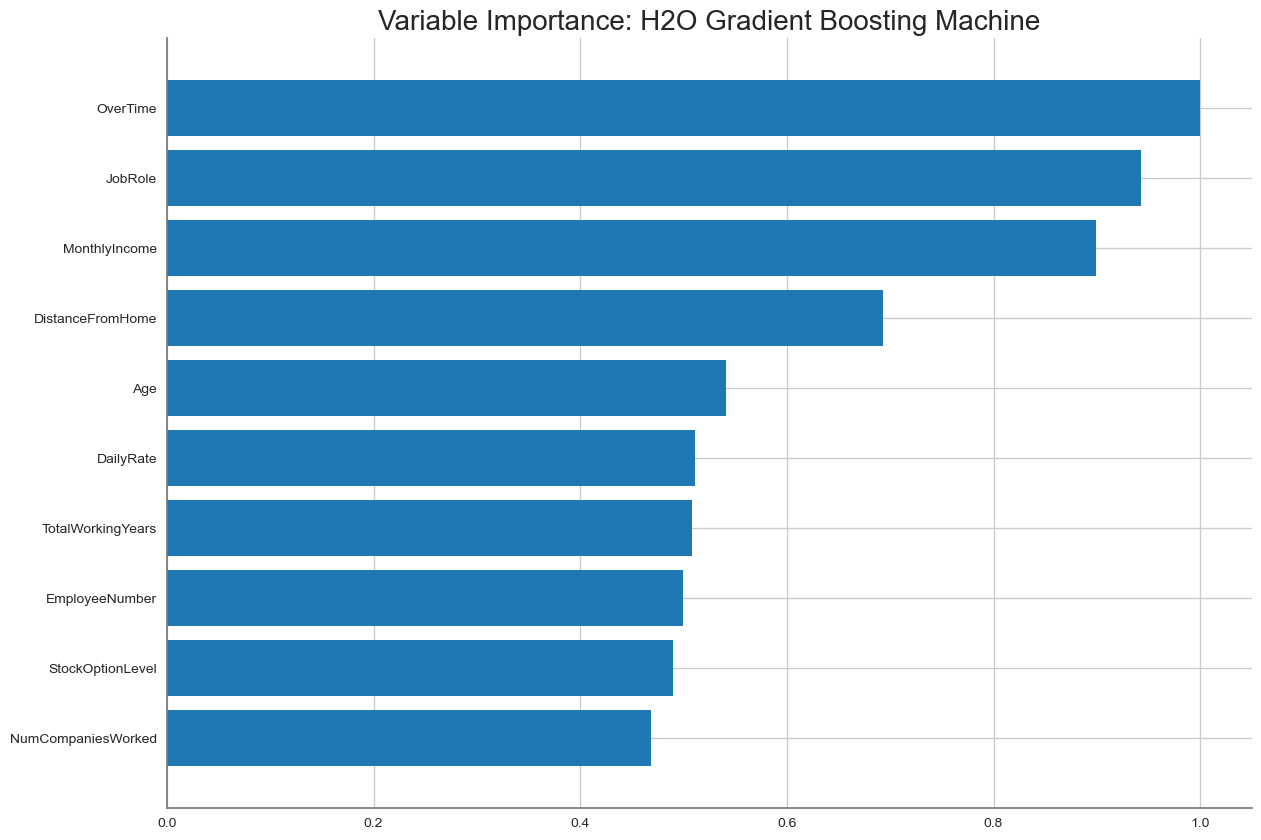

<Figure size 800x550 with 0 Axes>

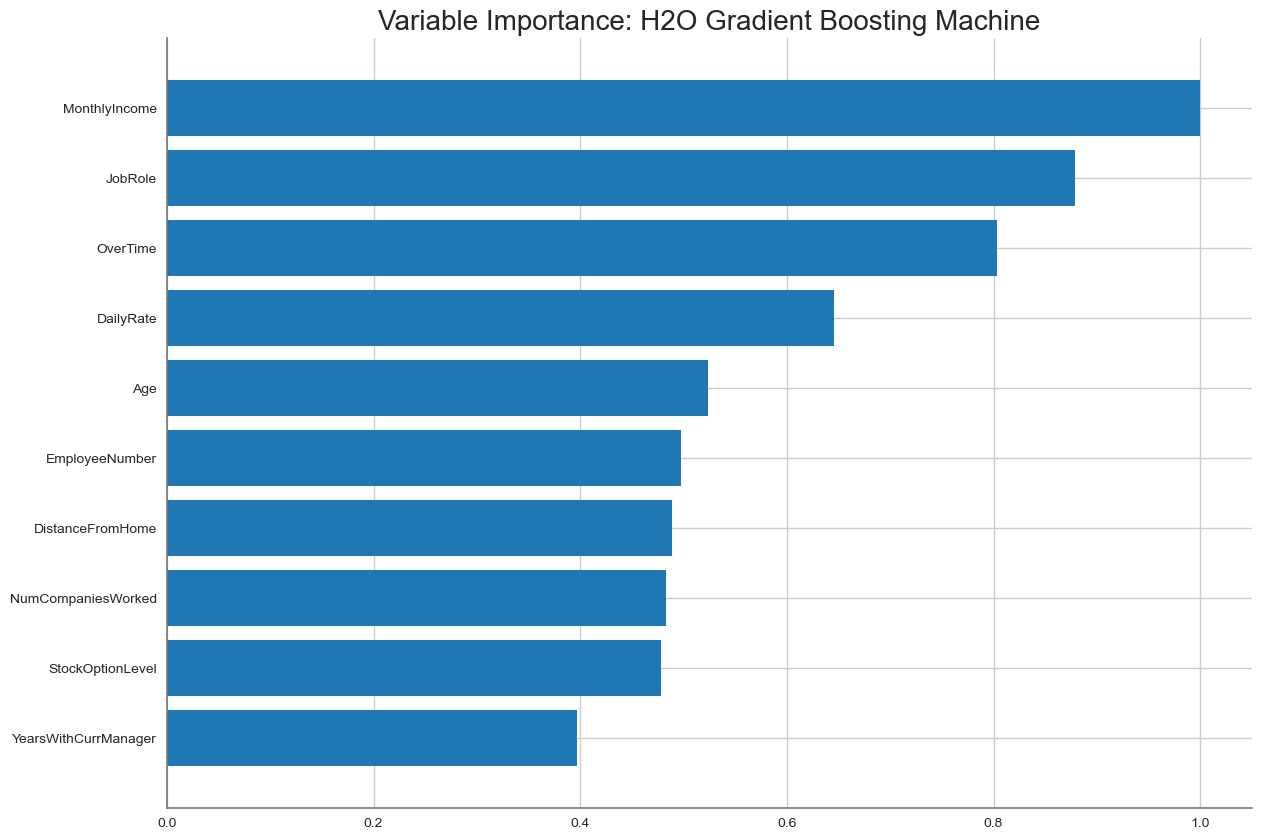

<Figure size 800x550 with 0 Axes>

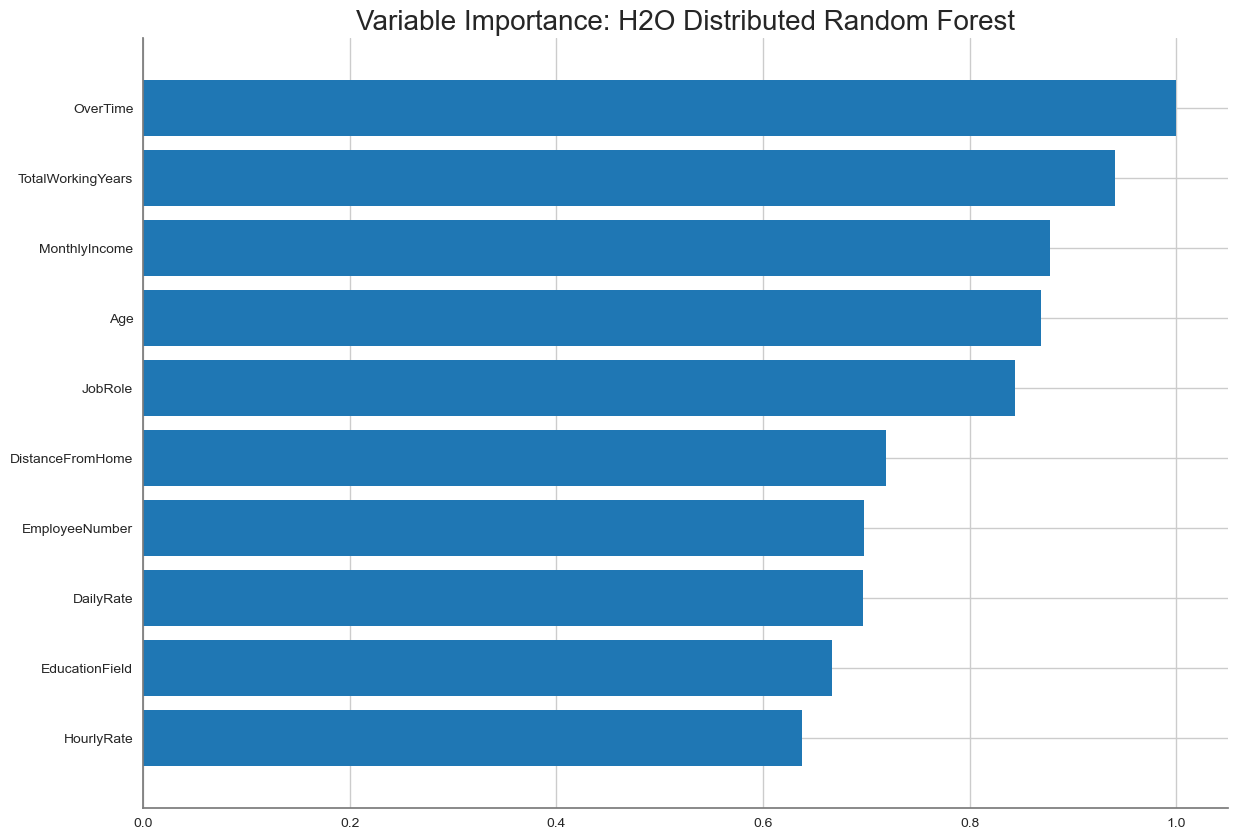

<Figure size 800x550 with 0 Axes>

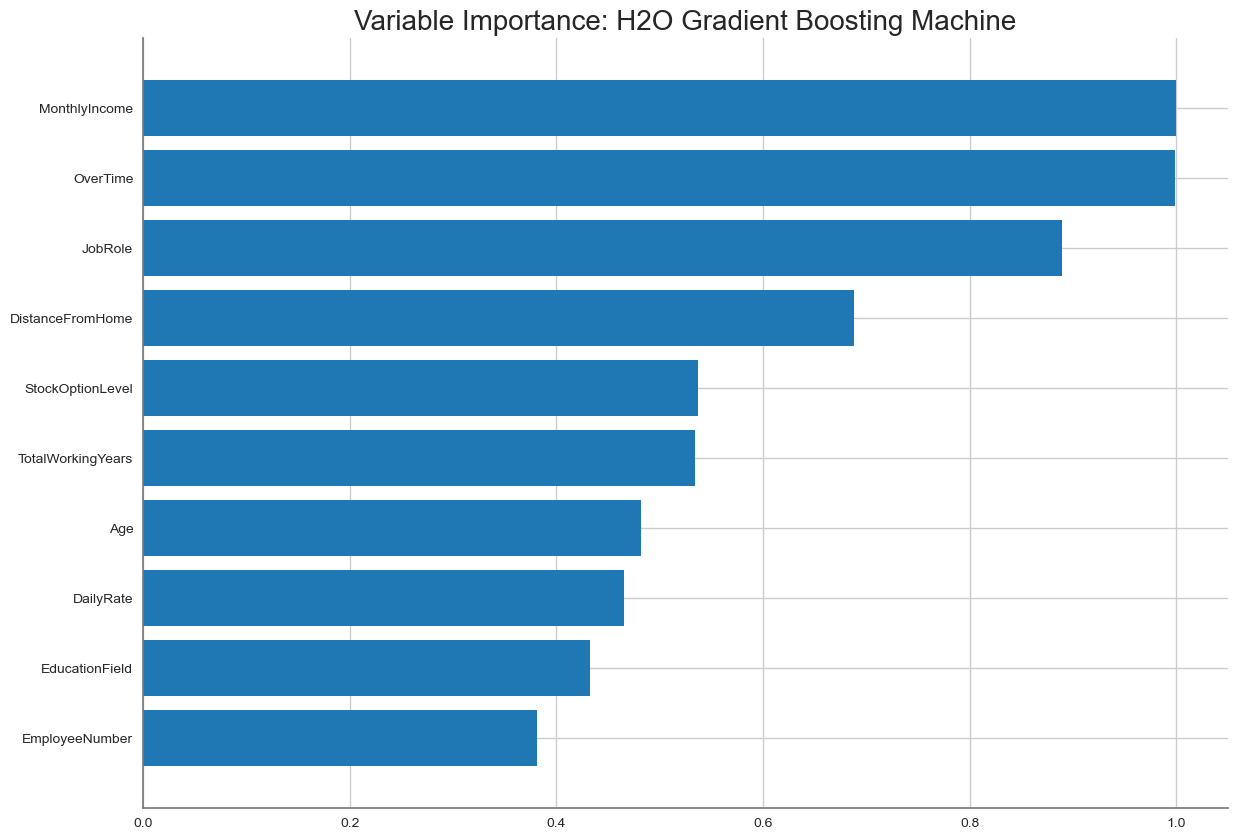

<Figure size 800x550 with 0 Axes>

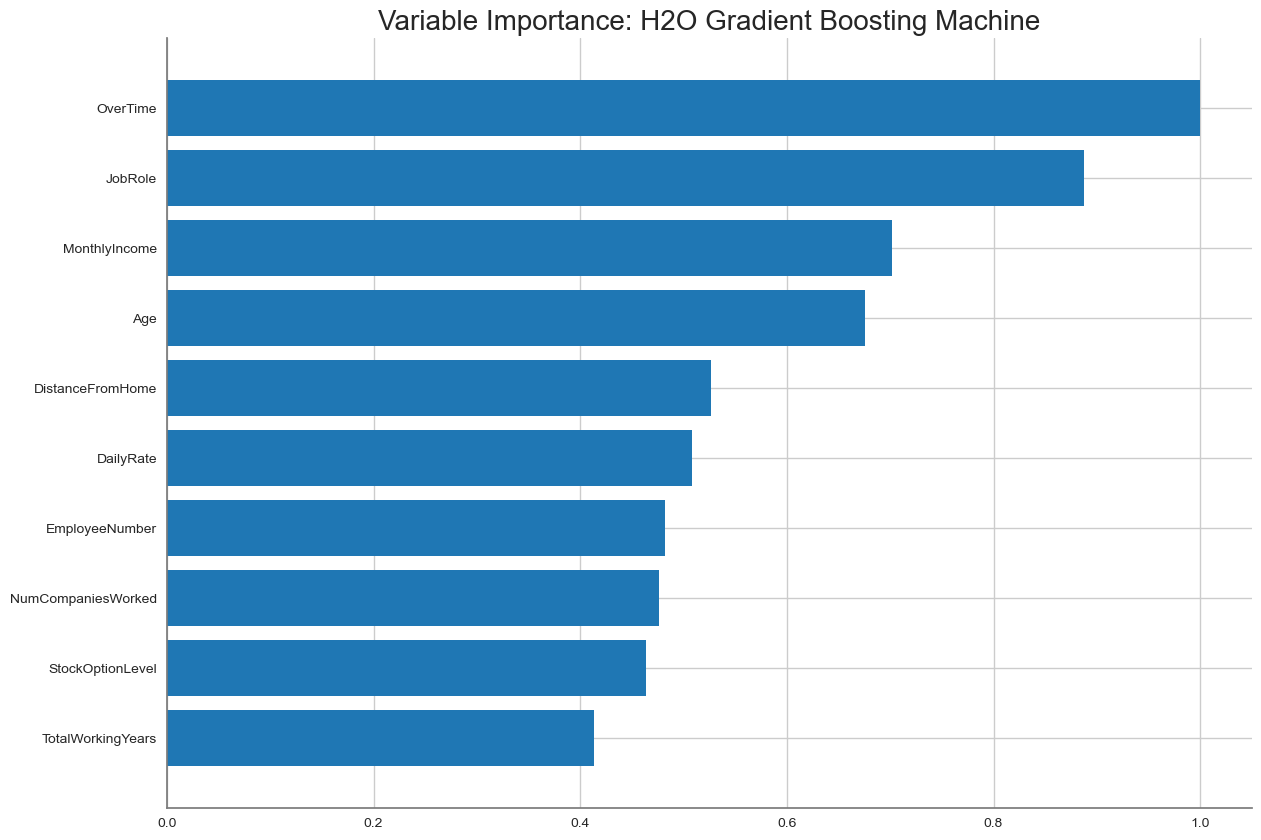

<Figure size 800x550 with 0 Axes>

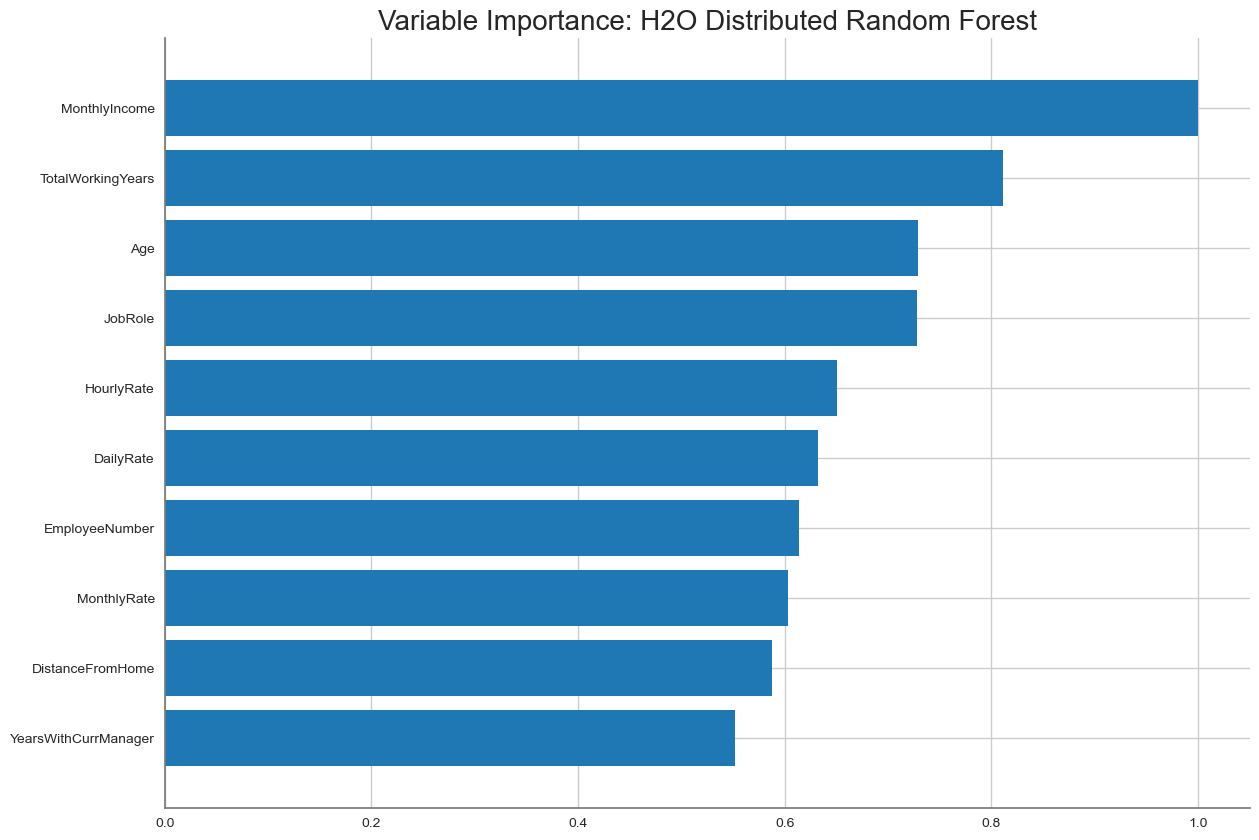

<Figure size 800x550 with 0 Axes>

In [102]:
import h2o
from h2o.automl import H2OAutoML

# Initialize and connect to the H2O cluster
h2o.init()

# Load the dataset
url = 'https://raw.githubusercontent.com/mukuldesai/DS/main/HR%20Employee%20Attrition.csv?token=GHSAT0AAAAAACNBX6PXMGL6M66EM5BNMA66ZNUIEPA'
data = h2o.import_file(path=url)

# Specify the predictor column and response column
y = 'Attrition'
X = data.columns.remove(y)

# Train the AutoML model
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=X, y=y, training_frame=data)

# Get the best model from AutoML leaderboard
best_model = h2o.get_model(aml.leaderboard[0, 'model_id'])

# Check if the best model is a stacked ensemble model
if best_model.algo == 'stackedensemble':
    base_models = best_model.base_models
    for model_id in base_models:
        model = h2o.get_model(model_id)
        if model.algo == 'gbm' or model.algo == 'drf' or model.algo == 'deepwater':
            model.varimp_plot()




In [103]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,JobRole,65.102638,1.000000,0.094109
1,MonthlyIncome,59.241718,0.909974,0.085637
2,OverTime,57.005684,0.875628,0.082405
3,DistanceFromHome,35.699955,0.548364,0.051606
4,DailyRate,35.289375,0.542058,0.051013
5,Age,34.120647,0.524105,0.049323
6,TotalWorkingYears,31.490843,0.483711,0.045522
7,NumCompaniesWorked,31.316219,0.481028,0.045269
8,EmployeeNumber,31.018858,0.476461,0.044839
9,EnvironmentSatisfaction,29.986179,0.460599,0.043347


In [104]:
h2o.cluster().shutdown()

H2O session _sid_be65 closed.


<h1>Conclusion</h1>

Importing Essential Libraries: The code kicks off by importing various Python libraries and H2O-related modules, preparing for data analysis and modeling.
Dataset Retrieval: It acquires a diabetes dataset from Kaggle utilizing the opendatasets library and designates the data directory.
Data Exploration and Visualization: The code proceeds to explore the dataset by generating scatter plots and correlation heatmaps using the seaborn library.
Initializing H2O Cluster: H2O cluster initialization sets the stage for in-depth analysis.
Data Import into H2O: The dataset is loaded into an H2O data frame, ready for analysis, using the h2o.import_file() function.
Data Split: The data is divided into training and test sets, a crucial step in model development, utilizing the split_frame() method.
Model Building and Training: The code constructs and trains two models – a Generalized Linear Model (GLM) and a Gradient Boosting Machine (GBM) – employing H2O's modeling capabilities.
Variable Importance Assessment: It evaluates and displays the importance of variables for both models.
Model Explainability: In the case of models like XGBoost, DRF, or GBM, the code elucidates their inner workings by offering feature importance insights and plots.
AutoML Setup: AutoML is configured for automating model selection and training.
AutoML Training: AutoML undergoes training on the dataset with a predetermined runtime.
Model Leaderboard: The code showcases a leaderboard featuring models generated by AutoML.
Model Selection: The best model is cherry-picked from the leaderboard.
Model Explanation: In case the top model is XGBoost, DRF, or GBM, its variable importances are visualized. For other models, their parameters are presented.
Evaluation of the Next Best Model: The code additionally assesses variable importances for the next best model to ensure a comprehensive understanding of the dataset.


In this analysis, we embarked on a comprehensive exploration of HR employee attrition utilizing advanced data science techniques. After importing essential Python libraries and retrieving the dataset from a GitHub repository, we delved into data exploration and visualization, uncovering relationships and patterns within the dataset through scatter plots and correlation heatmaps. Leveraging the capabilities of H2O, we initialized a cluster and imported the data, paving the way for model building and training. Two models, a Generalized Linear Model (GLM) and a Gradient Boosting Machine (GBM), were constructed and trained, with variable importance assessment shedding light on the key factors influencing attrition. Employing AutoML streamlined the model selection process, culminating in the identification of the best-performing model. Through visualizing variable importances, we gained insights into the underlying drivers of attrition, empowering organizations to formulate targeted strategies for employee retention. Overall, this analysis provides a comprehensive understanding of employee attrition dynamics, equipping businesses with actionable insights to enhance employee retention efforts and foster a more engaged workforce.

<h1>LICENSE</h1>

<h3>MIT License</h3>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<h1>References</h1>

H20-ML- https://www.youtube.com/watch?v=91QljBnvM7s 
Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression 
Dataset- https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition 
Professor's AutoML Notebook-https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

<h1>Questions</h1>


Q1) Is the relationship significant?

A relationship is considered statistically significant when the p-value for the variables is less than 0.05, indicating that there is a low probability of obtaining the observed results if the null hypothesis is true. In the case of the attrition dataset, we calculated the p-values using methods such as OLS. The analysis revealed that for most variables, the p-values were less than 0.05, indicating a significant relationship between those variables and attrition. However, some variables may have p-values above 0.05, suggesting further investigation into their significance.

Q2) Are any model assumptions violated?

Linear regression assumptions include a linear relationship between variables and minimal multicollinearity. Upon exploring the dataset and model, it's crucial to assess whether these assumptions hold. For instance, we need to examine if the relationship between predictor variables and attrition is linear and if multicollinearity exists among predictors. Violations of these assumptions may impact the reliability of the model's predictions and interpretations.

Q3) Is there any multicollinearity in the model?

Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. Identifying multicollinearity is essential as it can affect the model's coefficients and interpretation. By examining the correlation matrix or variance inflation factors (VIF), we can determine if multicollinearity exists in the attrition model. Addressing multicollinearity may involve removing correlated variables or applying techniques such as regularization.

Q4) In multivariate models, are predictor variables independent of all other predictor variables?

Independence among predictor variables is crucial for accurate model predictions and interpretations. By assessing the correlation matrix or visualizing relationships between predictors, we can determine if any variables are dependent on others. Variables that exhibit independence contribute unique information to the model, enhancing its predictive power and interpretability.

Q5) In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.

Ranking predictor variables based on their importance helps prioritize variables that have the most substantial impact on predicting attrition. By considering metrics such as variable importance plots, p-values, or feature selection techniques, we can identify and retain the most significant predictors while excluding less influential ones. This process optimizes the model's performance and simplifies its interpretation.

Q6) Does the model make sense?

Assessing the model's coherence involves evaluating its adherence to assumptions, accuracy metrics, and overall interpretability. A well-performing model should exhibit low error rates, significant predictors, and logical interpretations of coefficients. By examining metrics such as RMSE, R-squared, and residual plots, we can determine if the model effectively captures the relationship between predictors and attrition, providing valuable insights for decision-making.

Q7) Does regularization help?

Regularization techniques like Ridge or Lasso regression can help mitigate overfitting and improve the model's generalization performance. By penalizing large coefficients, regularization encourages simpler models that generalize well to unseen data. Evaluating the model's performance with and without regularization can reveal whether regularization improves predictive accuracy and stability.

Q8) Which independent variables are significant?

Identifying significant independent variables entails examining their p-values and assessing whether they contribute significantly to predicting attrition. Variables with p-values below a predetermined threshold (e.g., 0.05) are considered statistically significant and are likely to influence attrition outcomes. Analyzing variable importance plots or conducting hypothesis tests can aid in identifying these significant predictors.

Q9) Which hyperparameters are important?

Hyperparameters play a crucial role in fine-tuning model performance and generalization capabilities. Identifying important hyperparameters involves conducting hyperparameter tuning experiments and assessing their impact on model performance metrics. Techniques such as grid search or randomized search can help identify optimal hyperparameter values for algorithms like RandomForestRegressor or Gradient Boosting Machines.

Q10) Coding Professionalism

Professionalism in coding involves adhering to best practices, maintaining readability, and documenting procedures effectively. Importing libraries, utilizing appropriate data manipulation techniques, and implementing models with clear explanations demonstrate coding professionalism. Additionally, conducting thorough analyses, documenting results, and ensuring reproducibility contribute to the professionalism of the codebase.